In [201]:
#There are many other time series methods used commercially like Croston methods, ADIDA method

# First analyze the data
# Analyze the performance
# Running baselines ---  before running ml or dl algos run baseline models

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 21,9

%matplotlib inline
#########################################
#########################################
import xgboost as xgb
from sklearn.metrics import mean_squared_error
cpal = sns.color_palette()
plt.style.use('fivethirtyeight')
##########################################
##########################################
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cpal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
df = pd.read_csv('/kaggle/input/hourly-energy-consumption/AEP_hourly.csv')

In [5]:
df.set_index('Datetime',inplace=True)

In [6]:
df.index = pd.to_datetime(df.index)

<Axes: title={'center': 'AEP_hourly'}, xlabel='Datetime'>

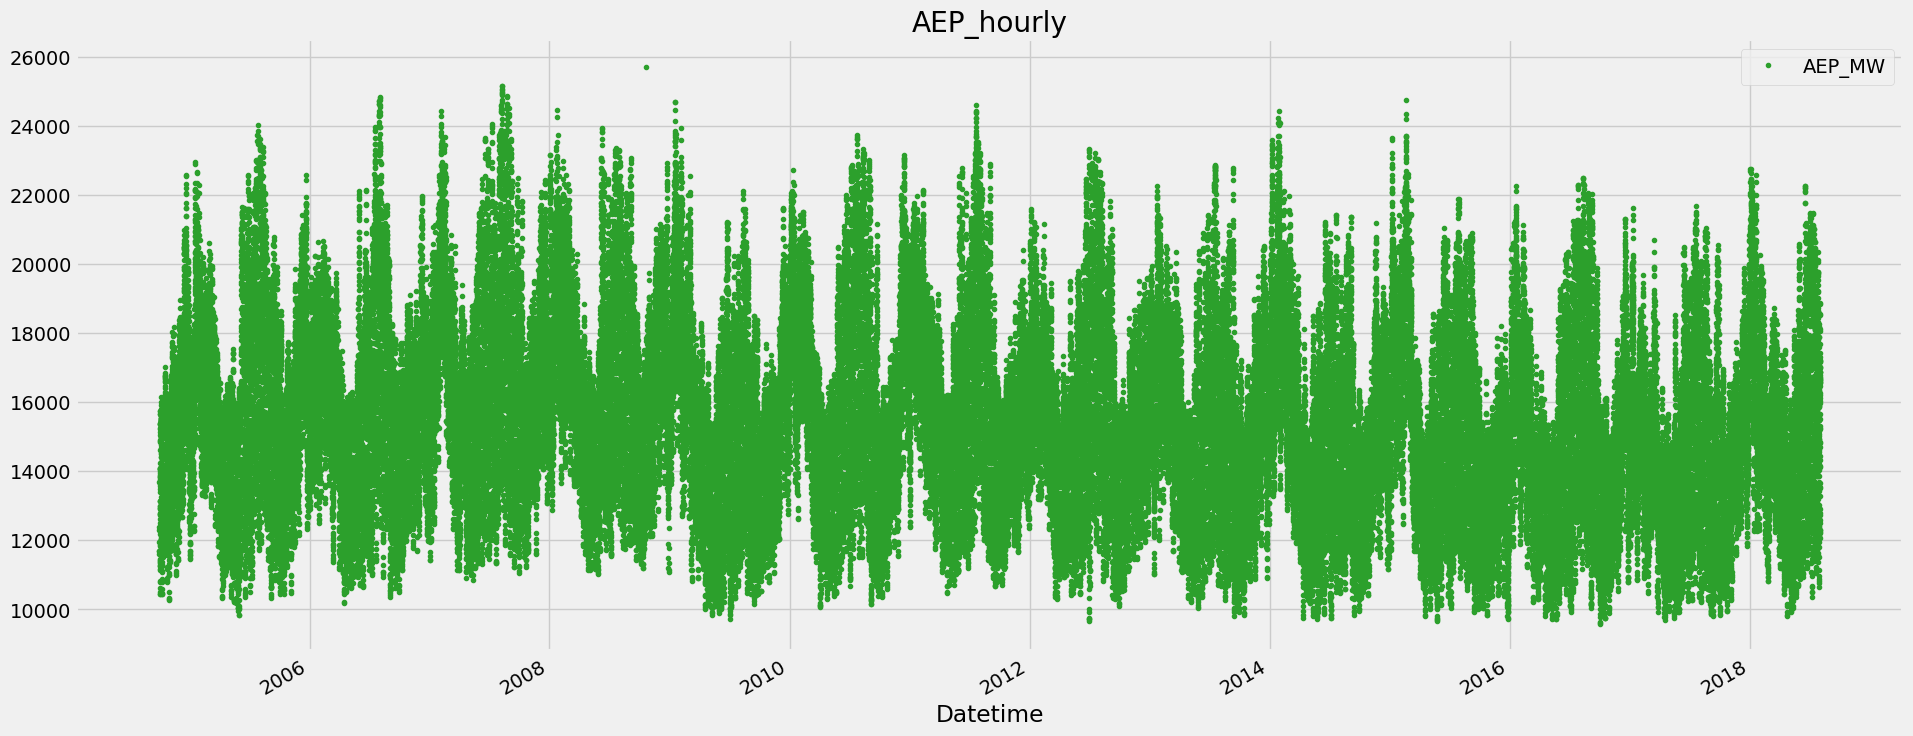

In [7]:
df.plot(style='.',
        figsize=(21,9),
        color=cpal[2],
        title='AEP_hourly')

In [8]:
df

AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0
...                      ...
2018-01-01 20:00:00  21089.0
2018-01-01 21:00:00  20999.0
2018-01-01 22:00:00  20820.0
2018-01-01 23:00:00  20415.0
2018-01-02 00:00:00  19993.0

[121273 rows x 1 columns]

In [9]:
# Doing the conventional way
import statsmodels.api as sm

dcmp = sm.tsa.seasonal_decompose(df.dropna(),period=730)


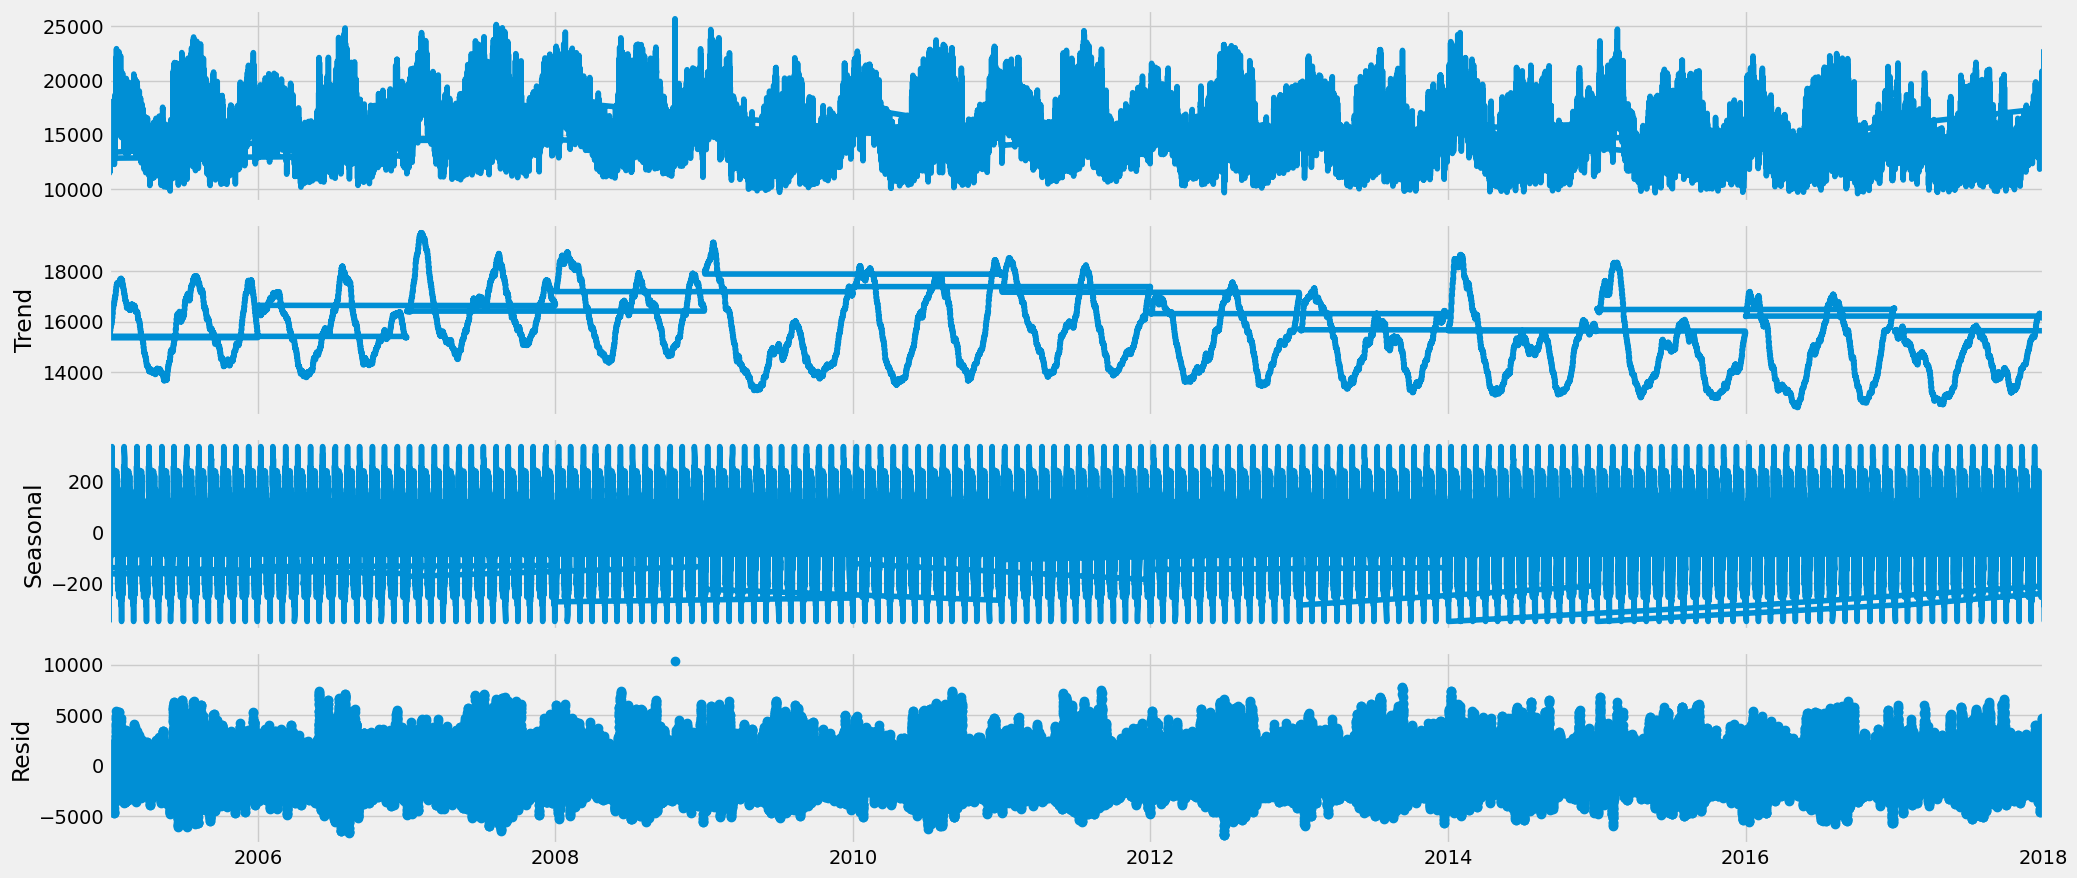

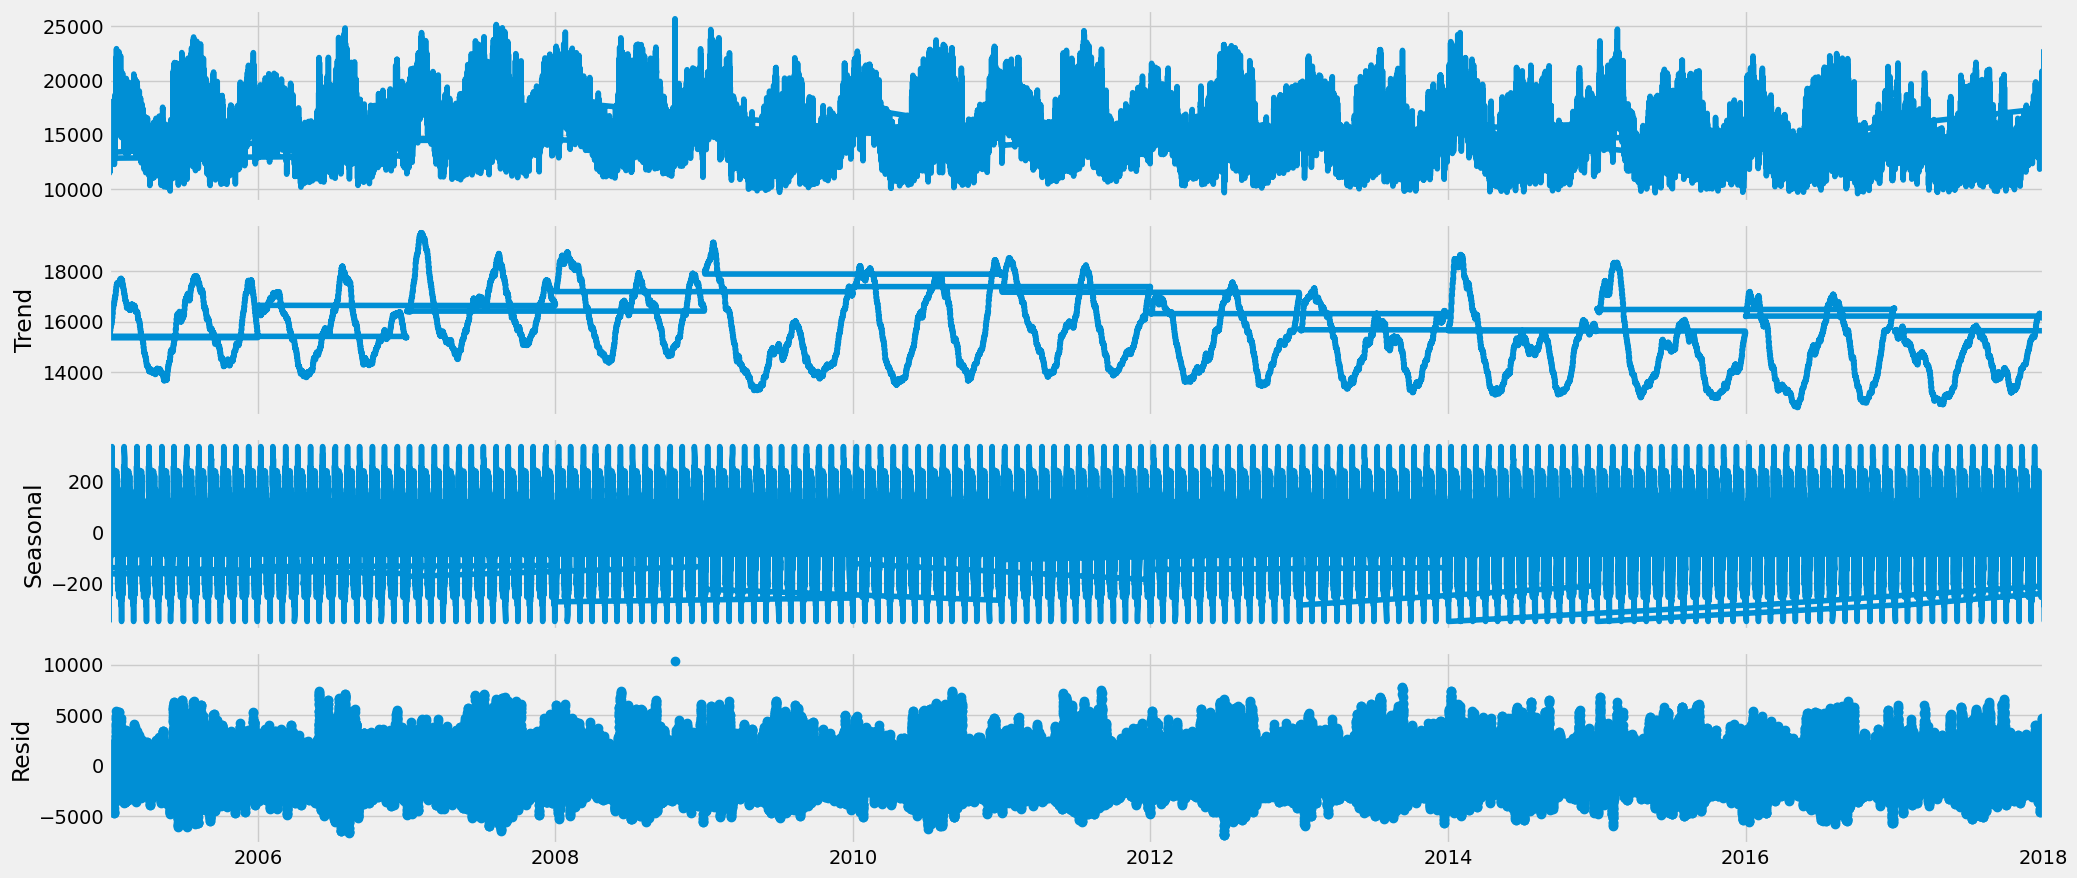

In [10]:
dcmp.plot()

## Train/Test Split

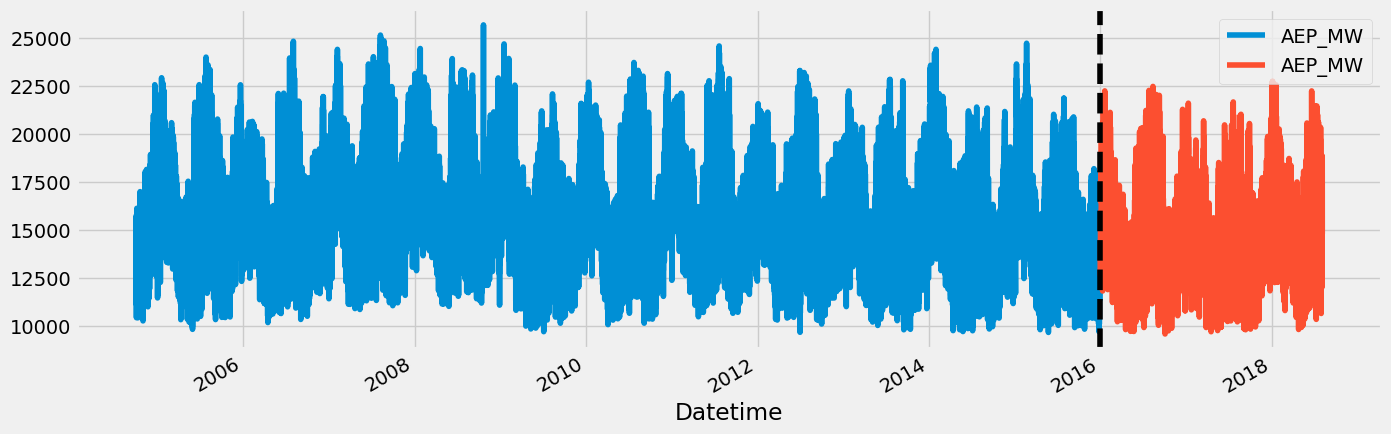

In [11]:
train = df.loc[df.index<'01-01-2016']
test = df.loc[df.index>='01-01-2016']


fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training set')
test.plot(ax=ax, label='Test set')
plt.axvline('01-01-2016',color='black',ls='--')

In [12]:
df.index

DatetimeIndex(['2004-12-31 01:00:00', '2004-12-31 02:00:00',
               '2004-12-31 03:00:00', '2004-12-31 04:00:00',
               '2004-12-31 05:00:00', '2004-12-31 06:00:00',
               '2004-12-31 07:00:00', '2004-12-31 08:00:00',
               '2004-12-31 09:00:00', '2004-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=121273, freq=None)

<Axes: xlabel='Datetime'>

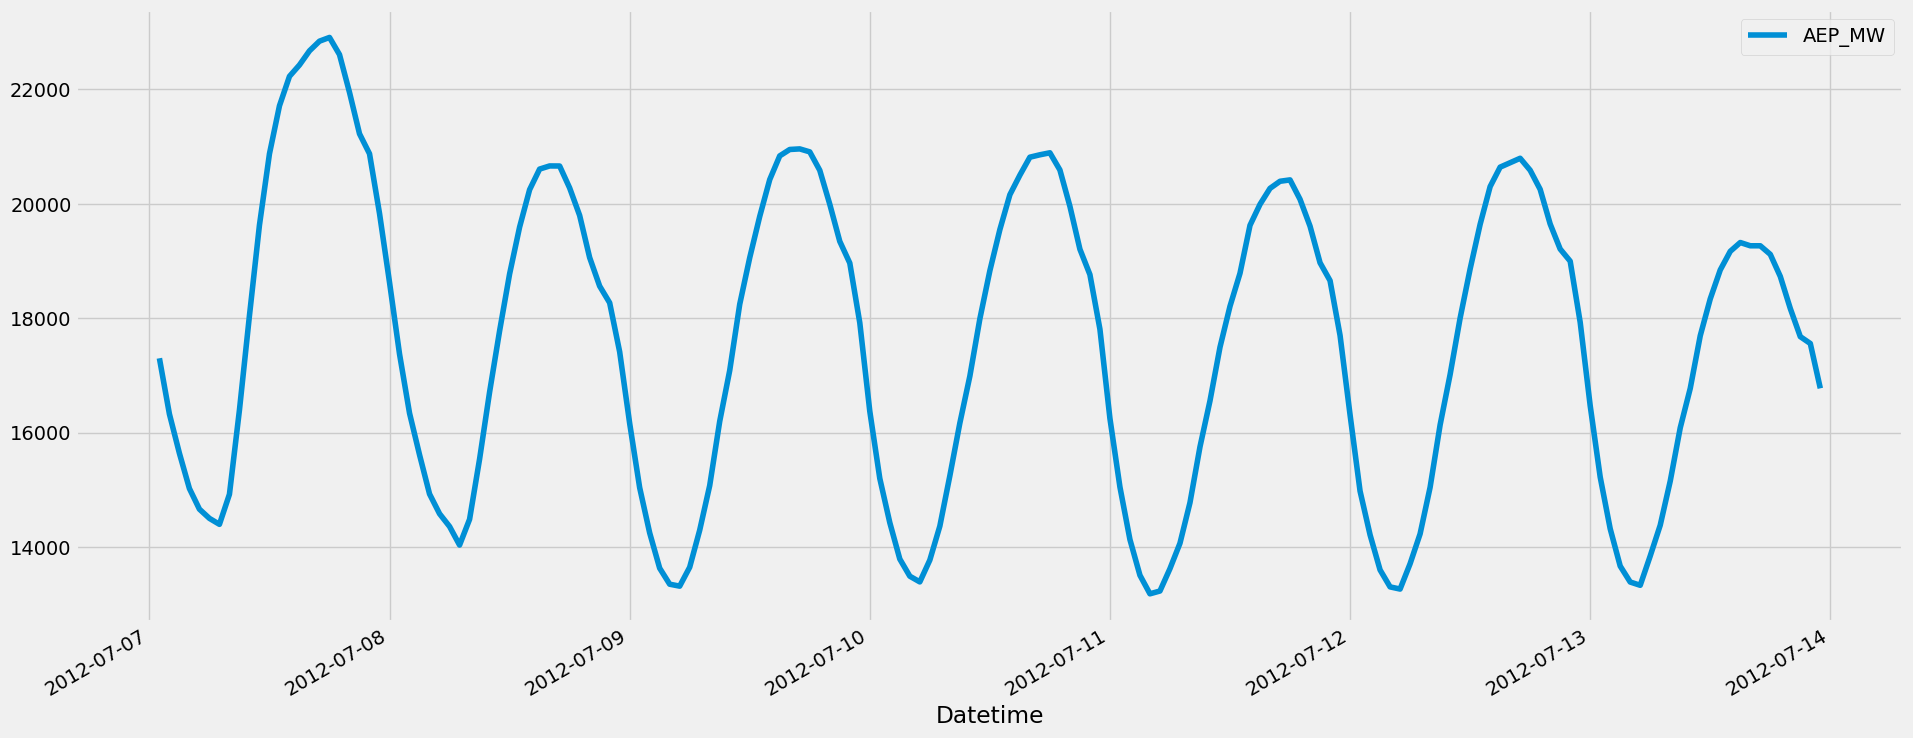

In [13]:
# checkout the weekly pattern

df.loc[(df.index>'07-07-2012') & (df.index<'14-07-2012')].plot()

In [14]:
def create_timesects(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_the_week'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['day_of_year'] = df.index.dayofyear
    df['month'] = df.index.month
    return df

df = create_timesects(df)

In [15]:
df.tail()

AEP_MW  hour  day_of_the_week  quarter  year  \
Datetime                                                             
2018-01-01 20:00:00  21089.0    20                0        1  2018   
2018-01-01 21:00:00  20999.0    21                0        1  2018   
2018-01-01 22:00:00  20820.0    22                0        1  2018   
2018-01-01 23:00:00  20415.0    23                0        1  2018   
2018-01-02 00:00:00  19993.0     0                1        1  2018   

                     day_of_year  month  
Datetime                                 
2018-01-01 20:00:00            1      1  
2018-01-01 21:00:00            1      1  
2018-01-01 22:00:00            1      1  
2018-01-01 23:00:00            1      1  
2018-01-02 00:00:00            2      1

<Axes: xlabel='hour', ylabel='AEP_MW'>

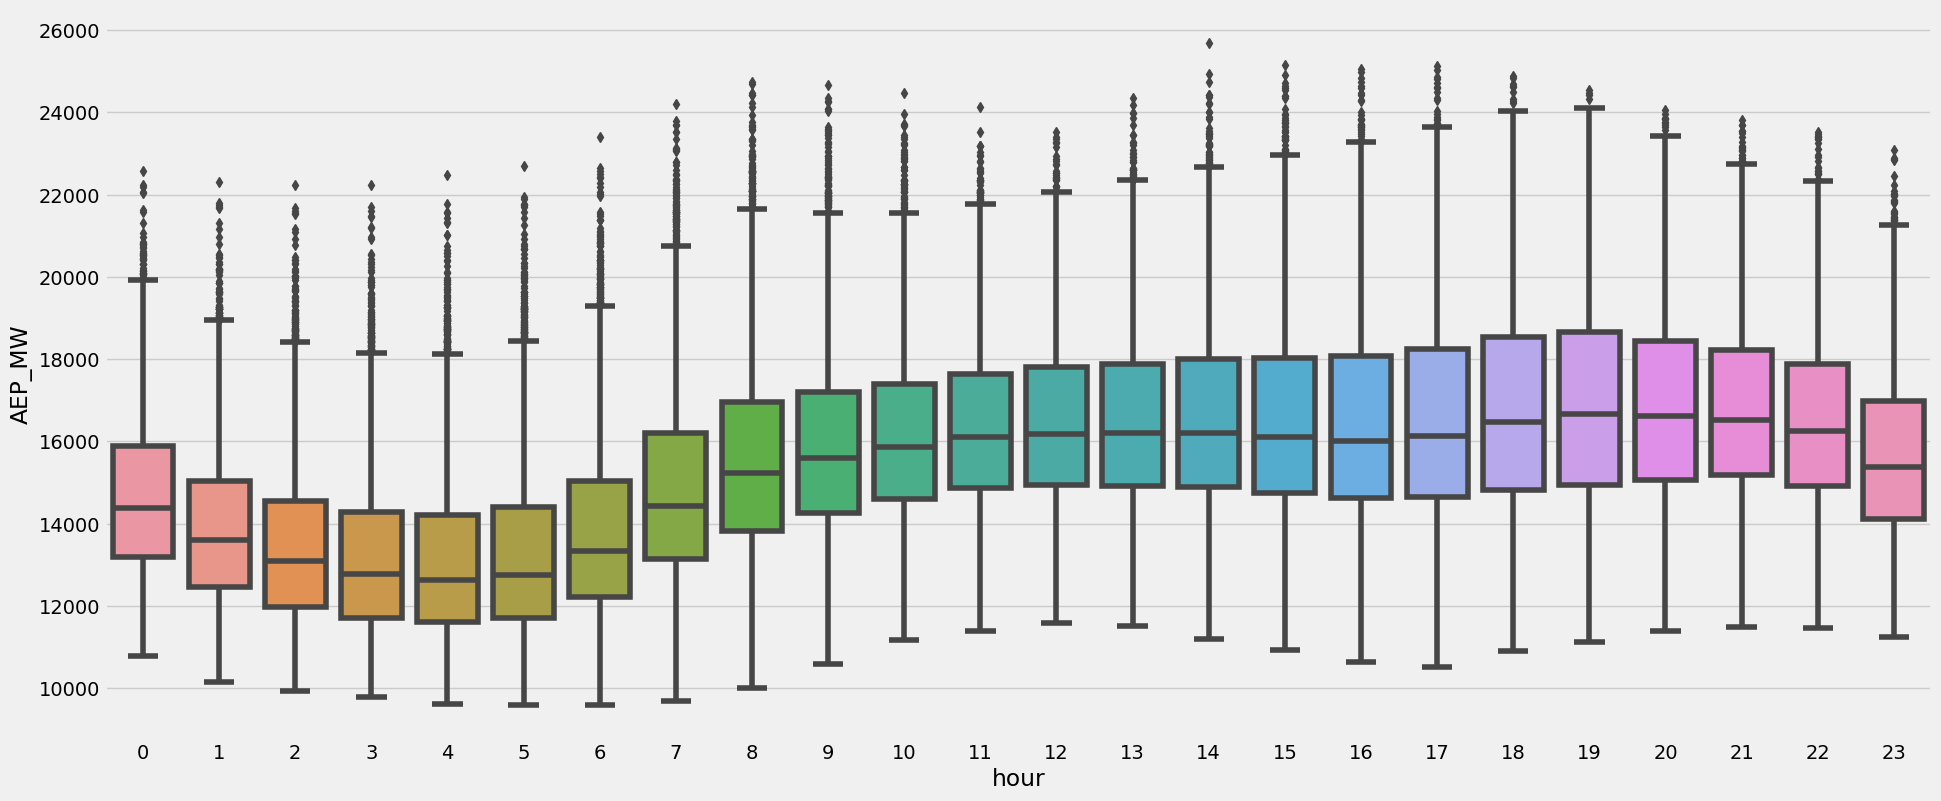

In [16]:
sns.boxplot(df,x='hour',y='AEP_MW')

/tmp/ipykernel_42/603167882.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(df, x='month', y='AEP_MW',palette='Reds')


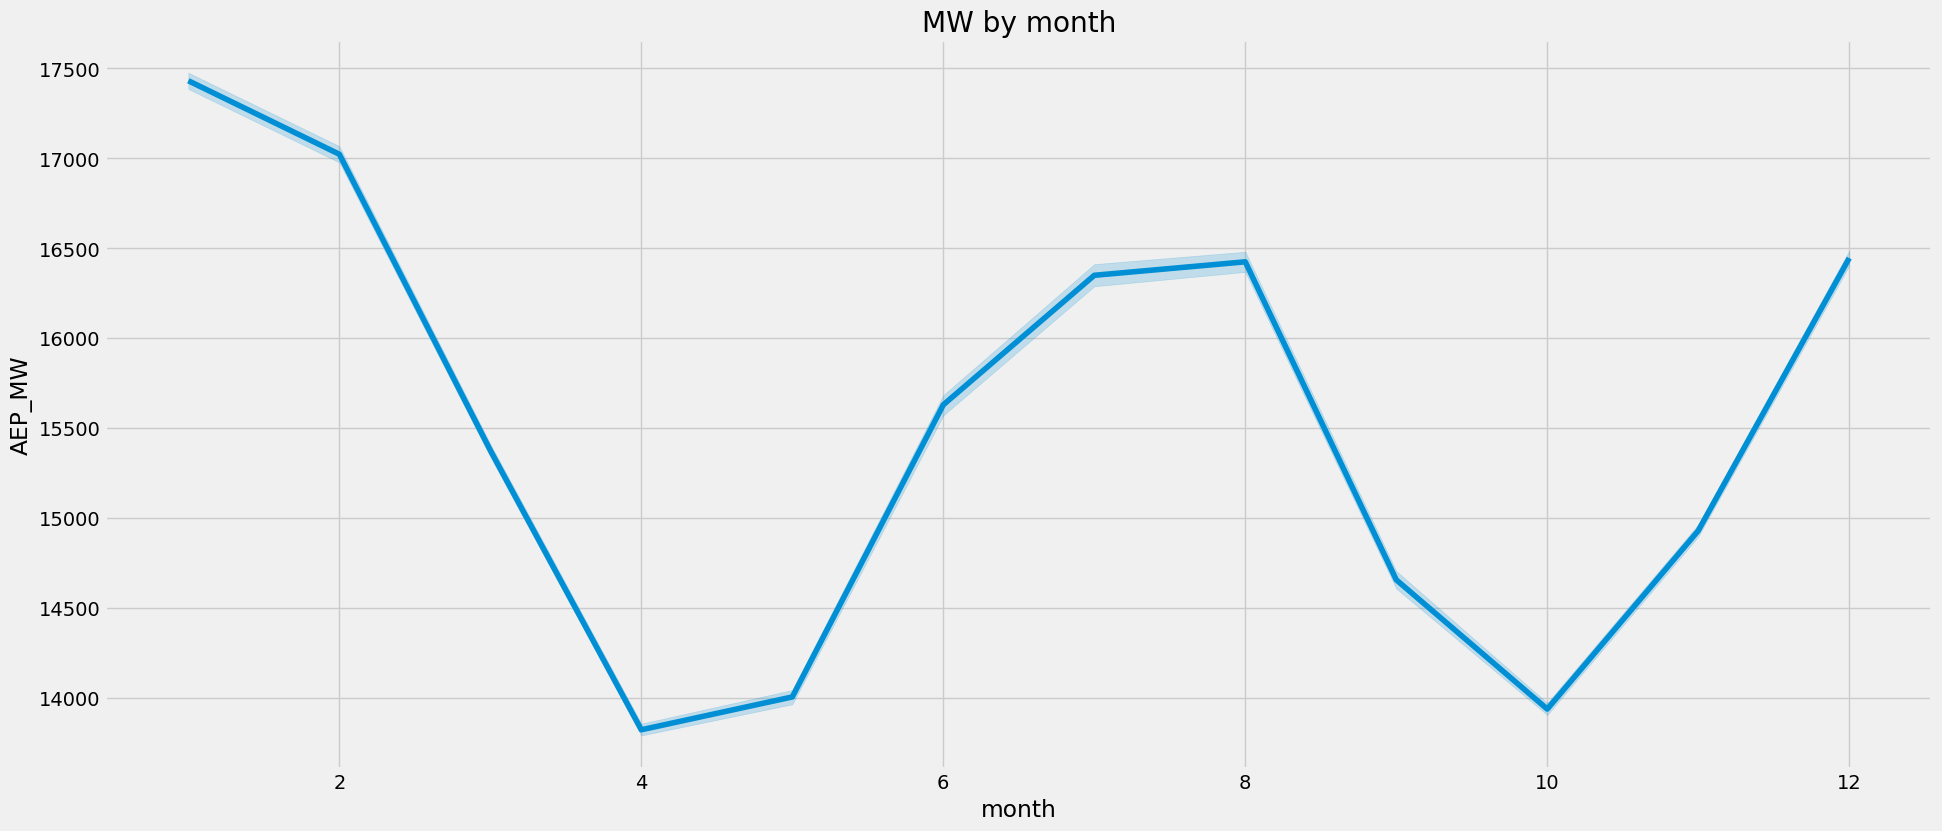

In [17]:
fig, ax= plt.subplots()
sns.lineplot(df, x='month', y='AEP_MW',palette='Reds')
ax.set_title('MW by month')
plt.show()


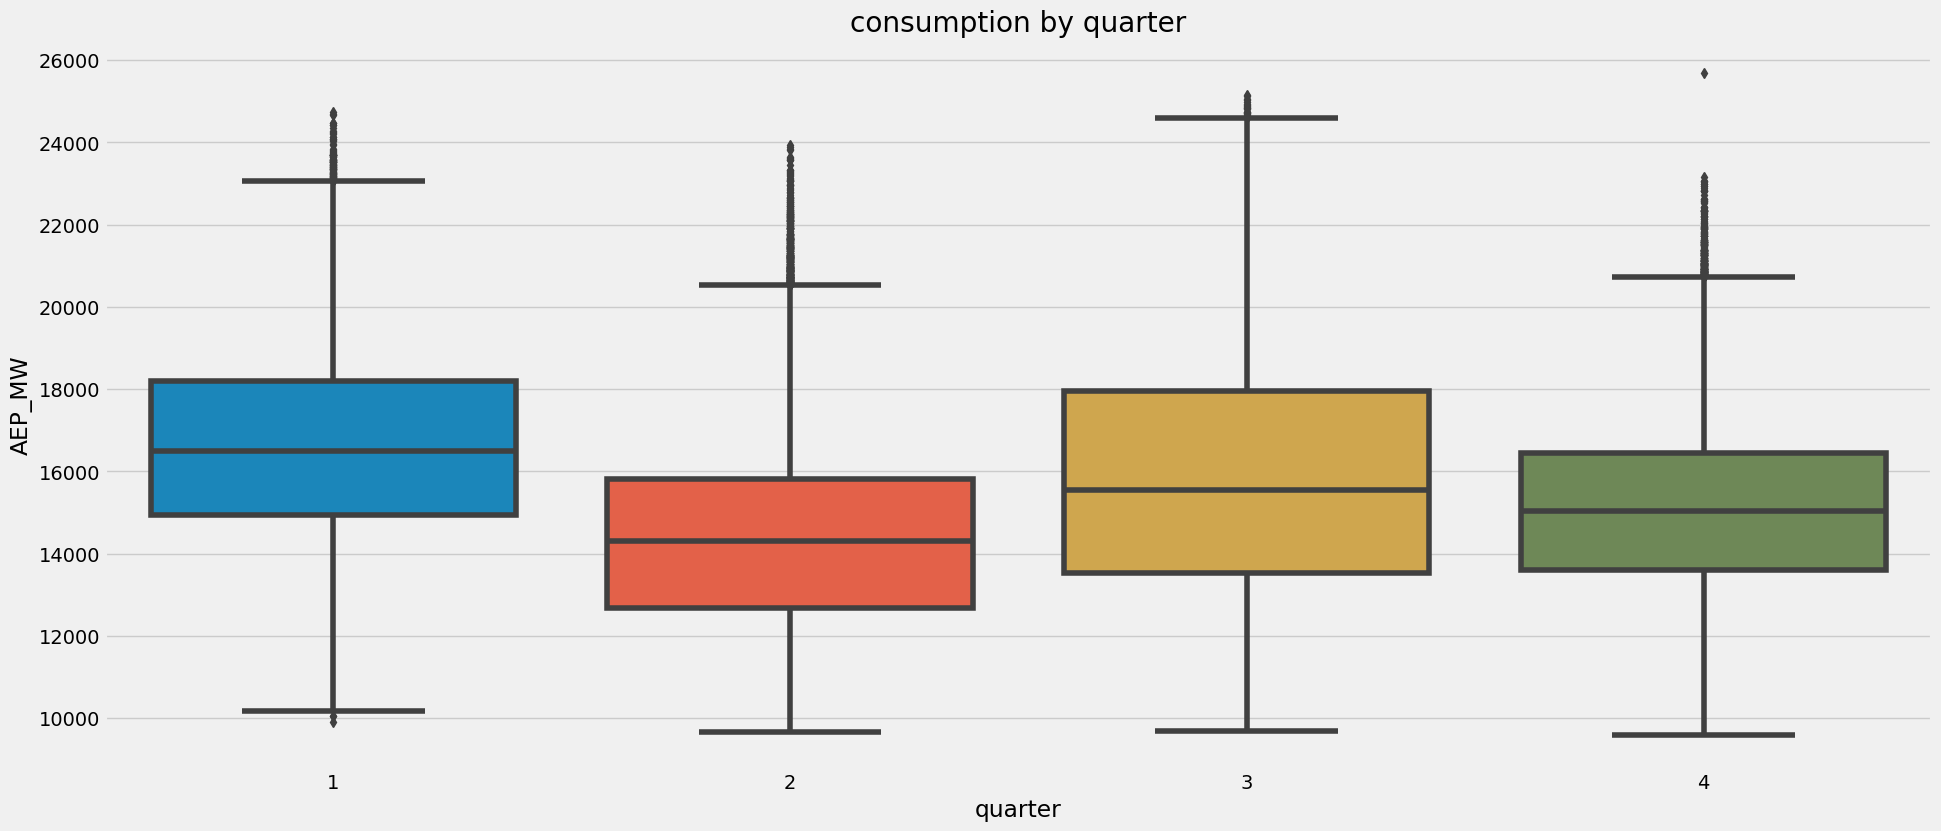

In [18]:
fig, ax = plt.subplots()
sns.boxplot(df, x='quarter', y='AEP_MW')
ax.set_title("consumption by quarter")
plt.show()

In [19]:
df.groupby('quarter').mean().sort_values('AEP_MW')

AEP_MW       hour  day_of_the_week         year  day_of_year  \
quarter                                                                       
2        14481.522012  11.500556         2.999804  2011.500392   136.217145   
4        15106.959616  11.502831         3.002459  2010.501472   319.788370   
3        15837.491711  11.499610         3.000848  2011.188189   226.932061   
1        16598.092577  11.503284         2.994917  2011.500710    45.597610   

             month  
quarter             
2         5.000065  
4        11.000065  
3         7.964200  
1         1.999571

In [20]:
df.columns

Index(['AEP_MW', 'hour', 'day_of_the_week', 'quarter', 'year', 'day_of_year',
       'month'],
      dtype='object')

In [21]:
features = ['hour', 'day_of_the_week', 'quarter', 'year', 'day_of_year',
       'month']
target = "AEP_MW"

In [22]:
train = create_timesects(train)
test = create_timesects(test)

In [23]:
reg = xgb.XGBRegressor(n_estimators=2000,learning_rate=0.01,booster='gbtree')
reg.fit(train[features],train[target],eval_set=[(test[features],test[target])],verbose=100,early_stopping_rounds=30)

[0]	validation_0-rmse:2614.77276


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:1891.52992
[200]	validation_0-rmse:1761.34225
[300]	validation_0-rmse:1735.56280
[363]	validation_0-rmse:1733.83510


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
fi = pd.DataFrame(reg.feature_importances_,index=reg.feature_names_in_,columns=['importance']).sort_values('importance')

<Axes: >

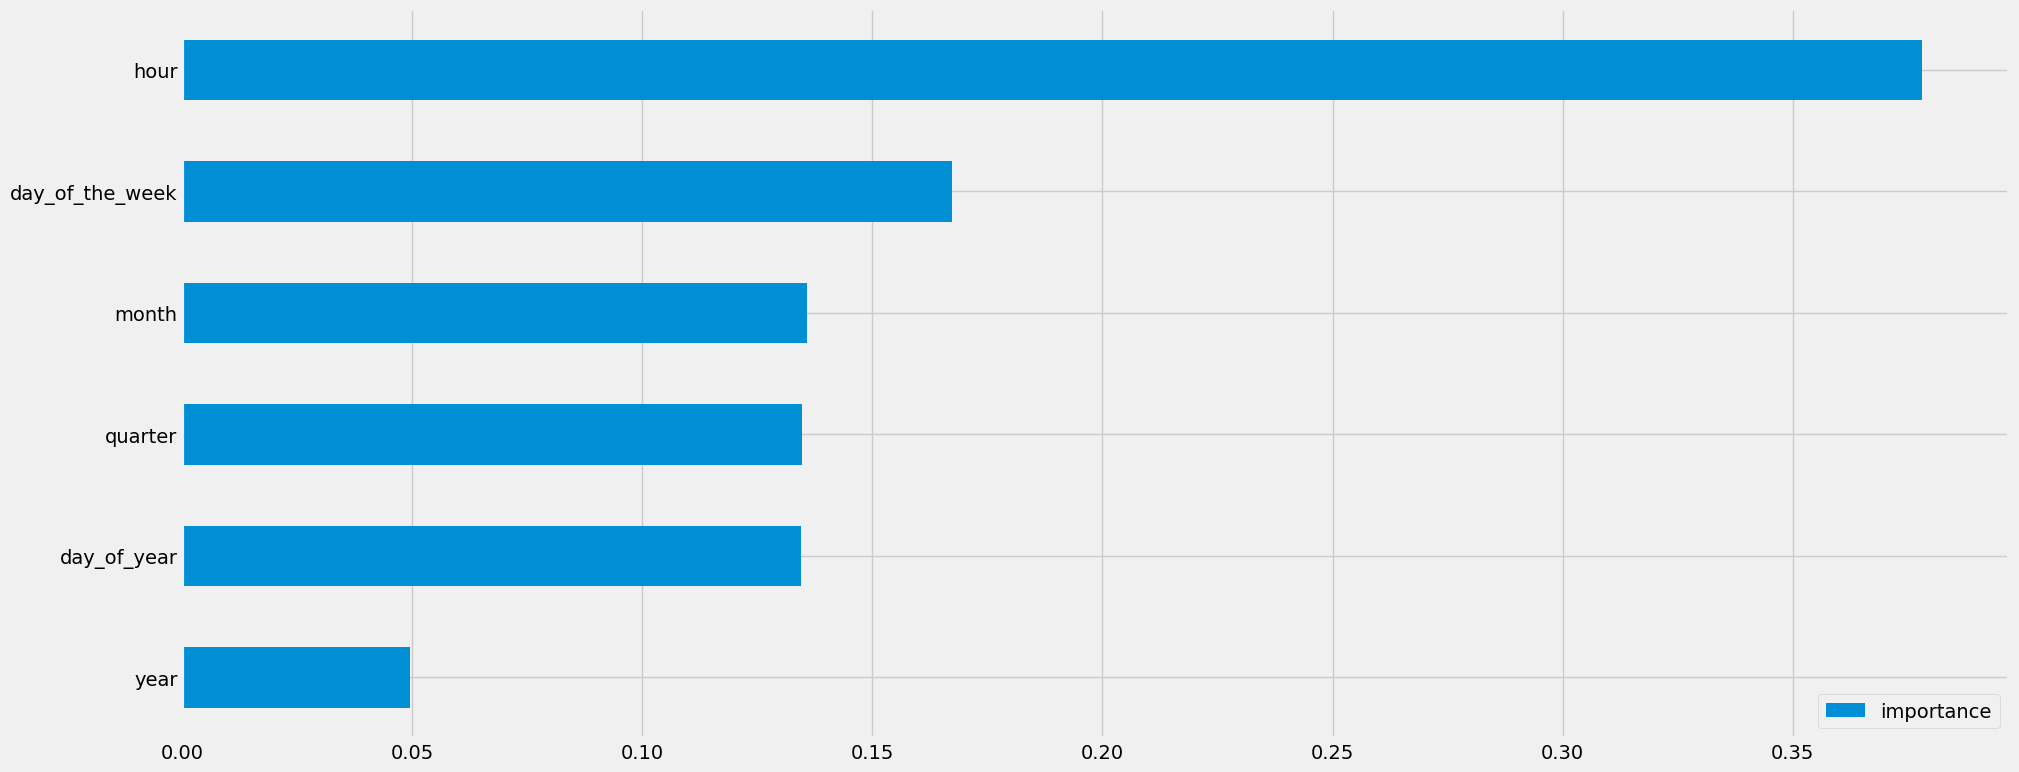

In [25]:
fi.plot(kind='barh')

In [26]:
test['preds'] = reg.predict(test[features])

<Axes: xlabel='Datetime'>

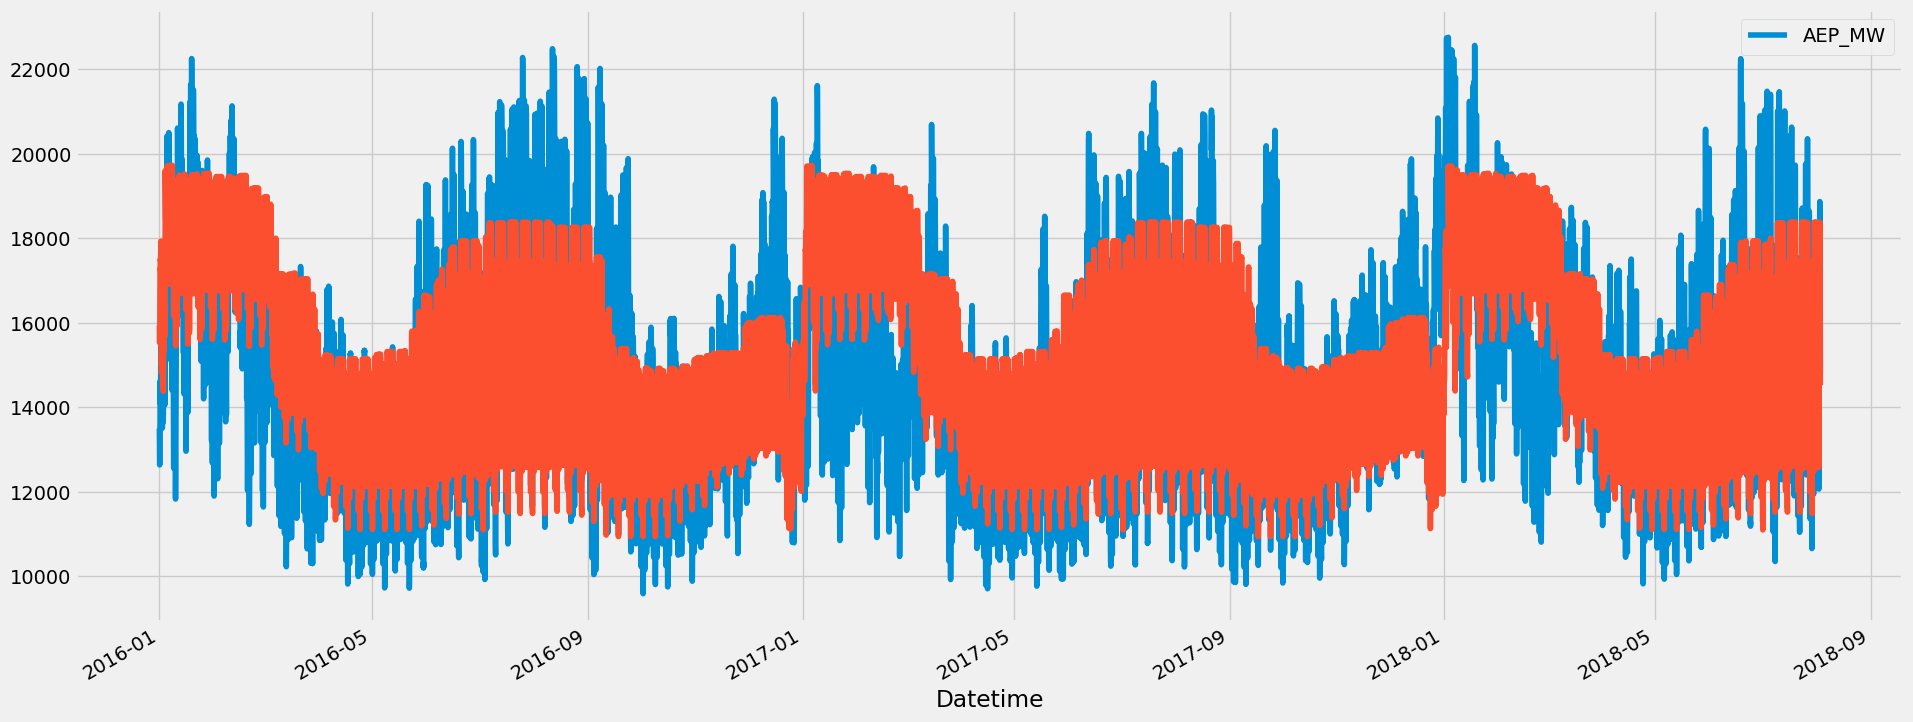

In [27]:
ax = test[['AEP_MW']].plot()
test['preds'].plot(ax=ax,style='-')

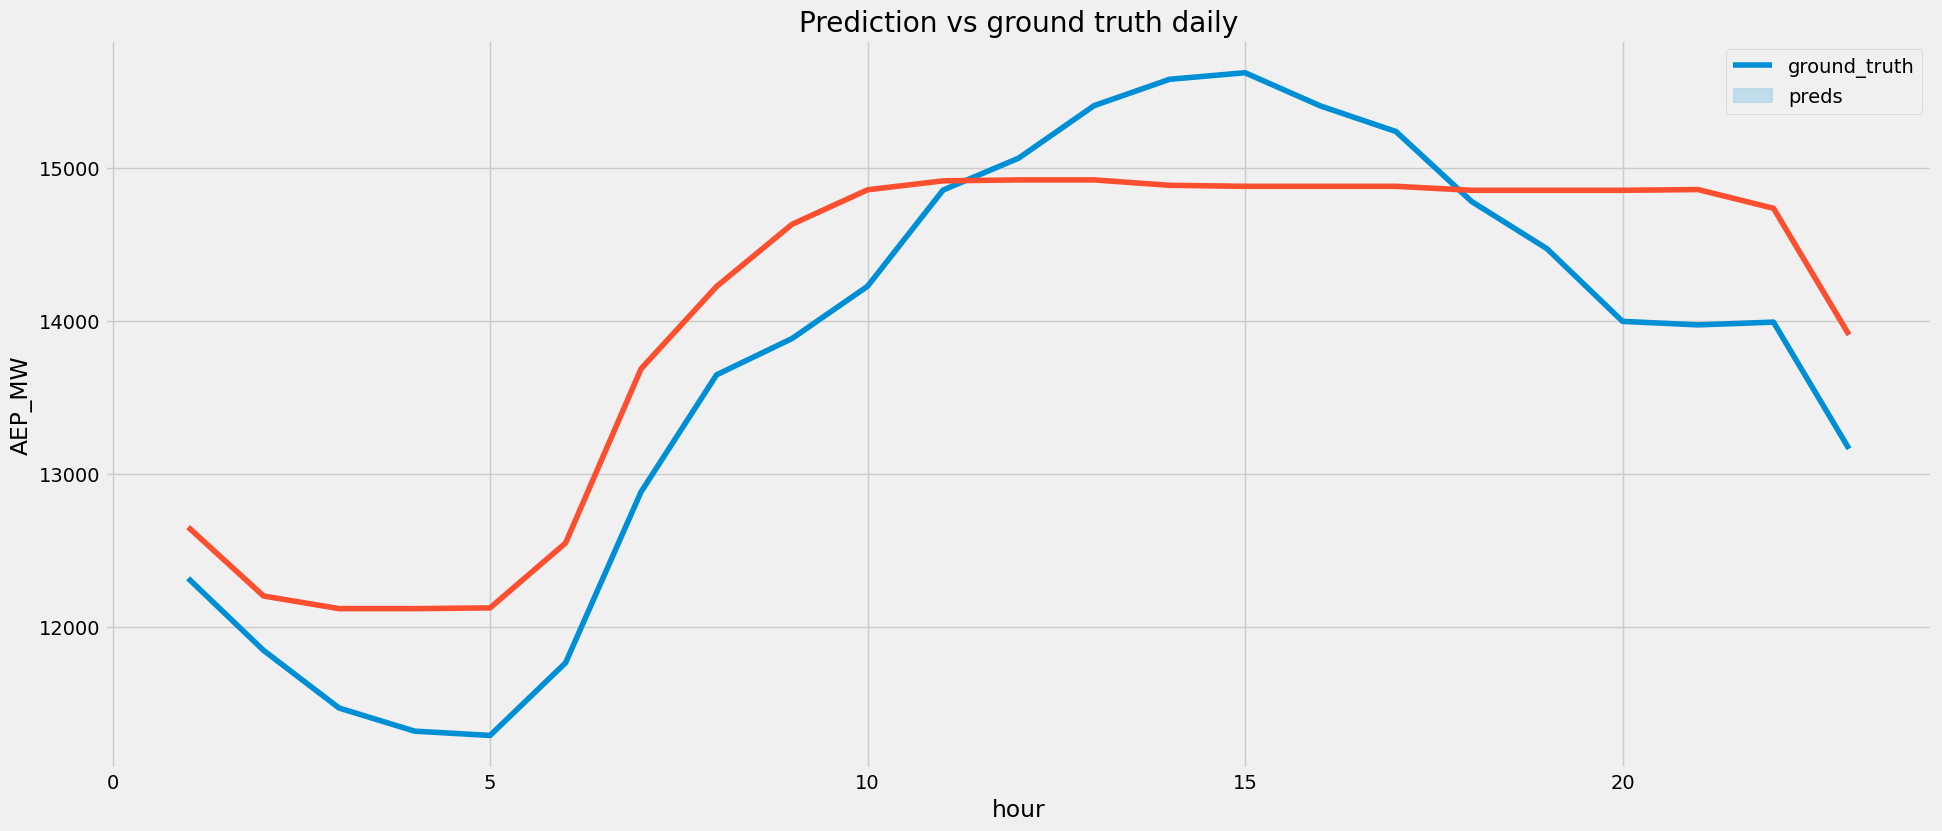

In [28]:
ax = sns.lineplot(test[(test.index>"05-04-2018")&(test.index<"05-05-2018")],x='hour',y='AEP_MW')
sns.lineplot(test[(test.index>"05-04-2018")&(test.index<"05-05-2018")],x='hour', y='preds')
ax.set_title("Prediction vs ground truth daily")
ax.legend(['ground_truth','preds'])

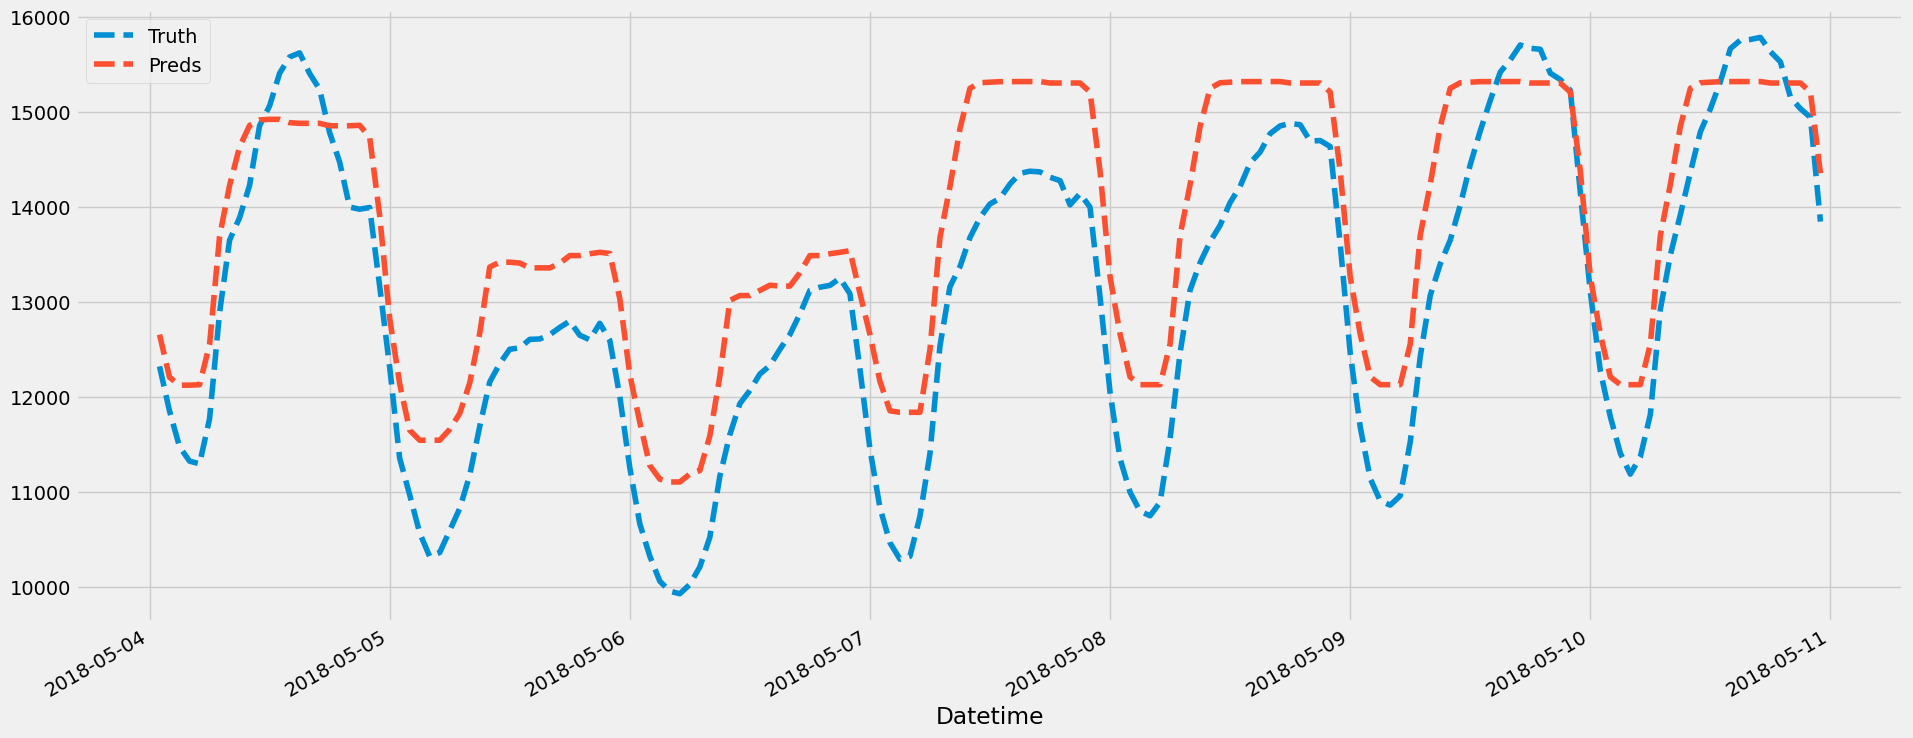

In [29]:
ax = test[(test.index>"05-04-2018")&(test.index<"05-11-2018")]['AEP_MW'].plot(style='--')
test[(test.index>"05-04-2018")&(test.index<"05-11-2018")]['preds'].plot(ax=ax,style='--')
ax.legend(['Truth','Preds'])

In [30]:
from sklearn.metrics import mean_squared_error
score = np.sqrt(mean_squared_error(test['AEP_MW'],test['preds']))
print(f"The RMSE score on test set: {score:.2f}")

The RMSE score on test set: 1731.31


In [31]:
df.drop('year',axis=1).head()

AEP_MW  hour  day_of_the_week  quarter  day_of_year  \
Datetime                                                                    
2004-12-31 01:00:00  13478.0     1                4        4          366   
2004-12-31 02:00:00  12865.0     2                4        4          366   
2004-12-31 03:00:00  12577.0     3                4        4          366   
2004-12-31 04:00:00  12517.0     4                4        4          366   
2004-12-31 05:00:00  12670.0     5                4        4          366   

                     month  
Datetime                    
2004-12-31 01:00:00     12  
2004-12-31 02:00:00     12  
2004-12-31 03:00:00     12  
2004-12-31 04:00:00     12  
2004-12-31 05:00:00     12

In [32]:
X_train, y_train, X_test, y_test = train[features],train[target],test[features],test[target]

In [33]:
X_train.head()

hour  day_of_the_week  quarter  year  day_of_year  month
Datetime                                                                     
2004-12-31 01:00:00     1                4        4  2004          366     12
2004-12-31 02:00:00     2                4        4  2004          366     12
2004-12-31 03:00:00     3                4        4  2004          366     12
2004-12-31 04:00:00     4                4        4  2004          366     12
2004-12-31 05:00:00     5                4        4  2004          366     12

XGBoost with advanced features

In [34]:
df.tail()

AEP_MW  hour  day_of_the_week  quarter  year  \
Datetime                                                             
2018-01-01 20:00:00  21089.0    20                0        1  2018   
2018-01-01 21:00:00  20999.0    21                0        1  2018   
2018-01-01 22:00:00  20820.0    22                0        1  2018   
2018-01-01 23:00:00  20415.0    23                0        1  2018   
2018-01-02 00:00:00  19993.0     0                1        1  2018   

                     day_of_year  month  
Datetime                                 
2018-01-01 20:00:00            1      1  
2018-01-01 21:00:00            1      1  
2018-01-01 22:00:00            1      1  
2018-01-01 23:00:00            1      1  
2018-01-02 00:00:00            2      1

In [35]:
a = df['AEP_MW'].values

In [109]:
df.head()

PJMW_MW  hour  day_of_the_week  quarter  year  \
Datetime                                                             
2002-12-31 01:00:00   5077.0     1                1        4  2002   
2002-12-31 02:00:00   4939.0     2                1        4  2002   
2002-12-31 03:00:00   4885.0     3                1        4  2002   
2002-12-31 04:00:00   4857.0     4                1        4  2002   
2002-12-31 05:00:00   4930.0     5                1        4  2002   

                     day_of_year  month  
Datetime                                 
2002-12-31 01:00:00          365     12  
2002-12-31 02:00:00          365     12  
2002-12-31 03:00:00          365     12  
2002-12-31 04:00:00          365     12  
2002-12-31 05:00:00          365     12

In [107]:
features = ['hour', 'day_of_the_week', 'quarter', 'year', 'day_of_year',
       'month']
target = 'AEP_MW'

In [108]:
train = df.loc[df.index<'01-01-2016']
test = df.loc[df.index>='01-01-2016']
X_train, y_train, X_test, y_test = train[features],train[target],test[features],test[target]

KeyError: 'AEP_MW'

In [42]:
pd.DataFrame(model.feature_importances_,index=model.feature_names_in_,columns=['Importance'])

NameError: name 'model' is not defined

In [ ]:
preds = model.predict(X_test)

In [ ]:
test['Pred'] = preds

In [ ]:
test.head()

In [ ]:
ax = test['AEP_MW'].plot()
test['Pred'].plot(ax=ax)

In [ ]:
ax = test[(test.index>"05-04-2018")&(test.index<"05-11-2018")]['AEP_MW'].plot(style='--')
test[(test.index>"05-04-2018")&(test.index<"05-11-2018")]['Pred'].plot(ax=ax,style='--')
ax.legend(['Truth','Preds'])

In [ ]:
#adding daily moving average and testing the model again

The model improves a lot in this step

In [43]:
D_MVA = df.groupby(df.index.date)['AEP_MW'].mean()
df_new = pd.merge(df, D_MVA, how='inner',left_on=df.index.date,right_on=D_MVA.index)
df_new.index = df.index
df_new.rename(columns={'AEP_MW_y':"D_AVG"},inplace=True)
df_new.tail()

key_0  AEP_MW_x  hour  day_of_the_week  quarter  \
Datetime                                                                    
2018-01-01 20:00:00  2018-01-02   21971.0    20                1        1   
2018-01-01 21:00:00  2018-01-02   21942.0    21                1        1   
2018-01-01 22:00:00  2018-01-02   21695.0    22                1        1   
2018-01-01 23:00:00  2018-01-02   21230.0    23                1        1   
2018-01-02 00:00:00  2018-01-02   19993.0     0                1        1   

                     year  day_of_year  month    Lag    D_AVG  
Datetime                                                       
2018-01-01 20:00:00  2018            2      1  246.0  20938.5  
2018-01-01 21:00:00  2018            2      1  -29.0  20938.5  
2018-01-01 22:00:00  2018            2      1 -247.0  20938.5  
2018-01-01 23:00:00  2018            2      1 -465.0  20938.5  
2018-01-02 00:00:00  2018            2      1 -422.0  20938.5

In [44]:
features = ['hour', 'day_of_the_week', 'quarter', 'year', 'day_of_year',
       'month', 'Lag','D_AVG']
target = 'AEP_MW_x'
train = df_new.loc[df.index<'01-01-2016']
test = df_new.loc[df.index>='01-01-2016']
X_train, y_train, X_test, y_test = train[features],train[target],test[features],test[target]

In [45]:
model = xgb.XGBRegressor(n_estimators=5000,learning_rate=0.01,booster='gbtree')
model.fit(X_train,y_train,eval_set=[(X_test, y_test)], verbose=100, early_stopping_rounds=30)

[0]	validation_0-rmse:2607.21307


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:1308.52165
[200]	validation_0-rmse:875.91639
[300]	validation_0-rmse:712.92371
[400]	validation_0-rmse:637.26125
[500]	validation_0-rmse:595.96836
[600]	validation_0-rmse:572.58955
[700]	validation_0-rmse:556.02257
[800]	validation_0-rmse:542.38678
[900]	validation_0-rmse:531.24422
[1000]	validation_0-rmse:521.28462
[1100]	validation_0-rmse:516.89380
[1200]	validation_0-rmse:510.66248
[1300]	validation_0-rmse:506.25989
[1400]	validation_0-rmse:501.53037
[1500]	validation_0-rmse:498.61852
[1600]	validation_0-rmse:497.46877
[1623]	validation_0-rmse:498.64658


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: >

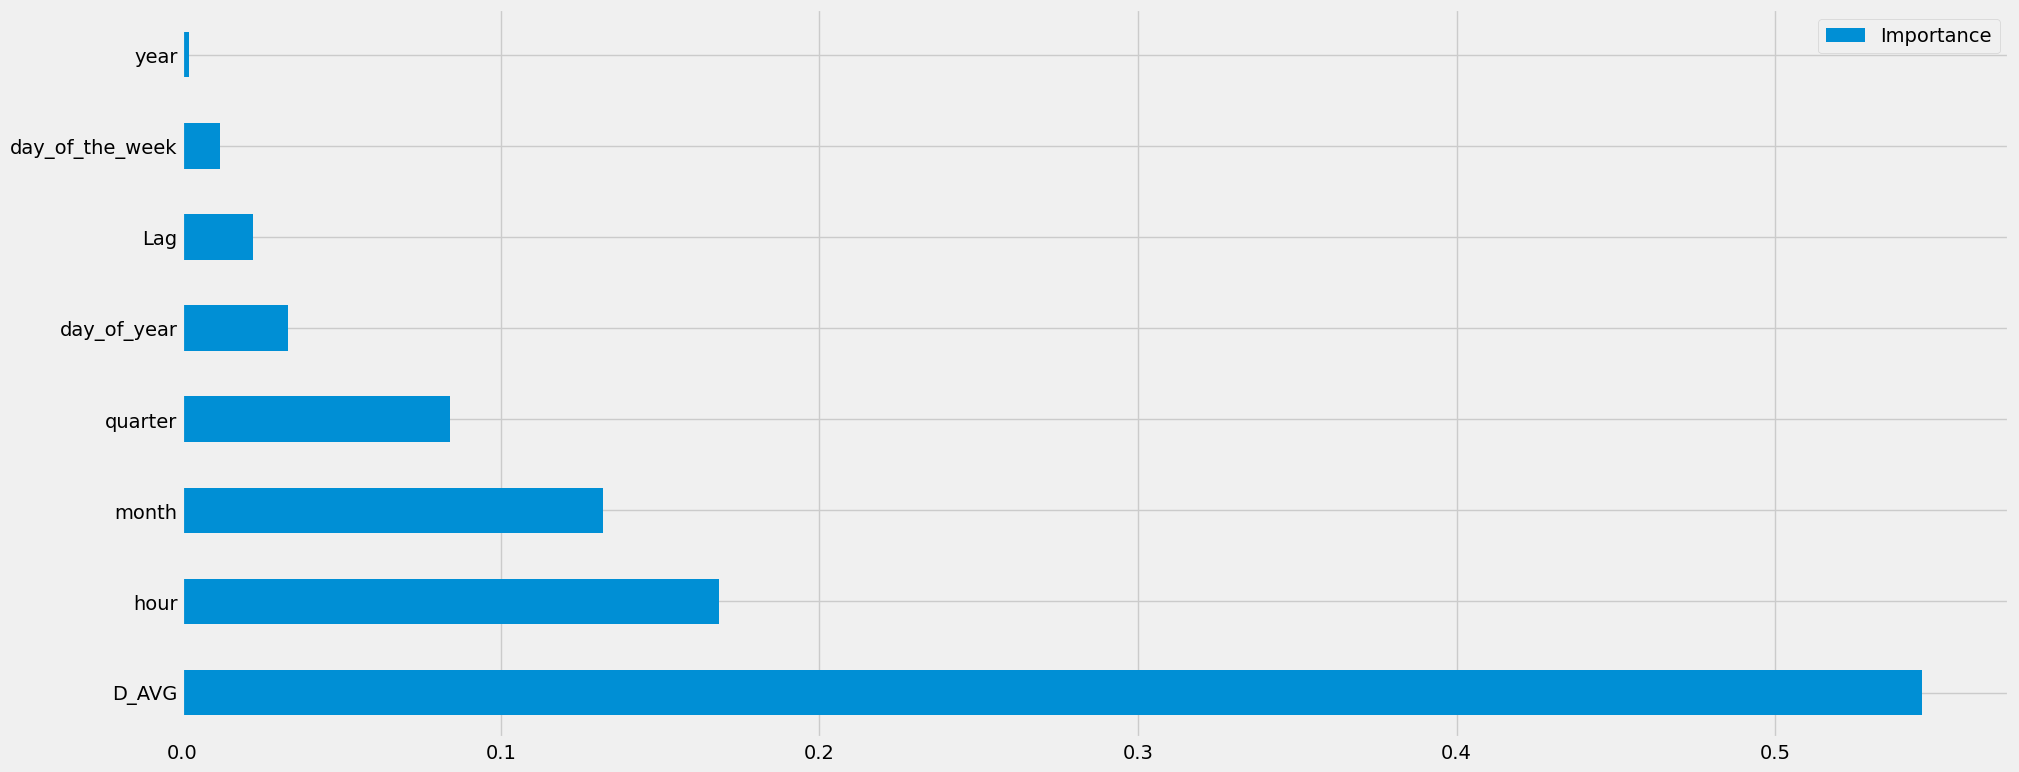

In [46]:
fi = pd.DataFrame(model.feature_importances_,index=model.feature_names_in_,columns=['Importance']).sort_values(by='Importance',ascending=False)

## Clearly the moving average plays a crucial role 

fi.plot(kind='barh')

In [47]:
test['Pred'] = model.predict(X_test)

/tmp/ipykernel_42/142978642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = model.predict(X_test)


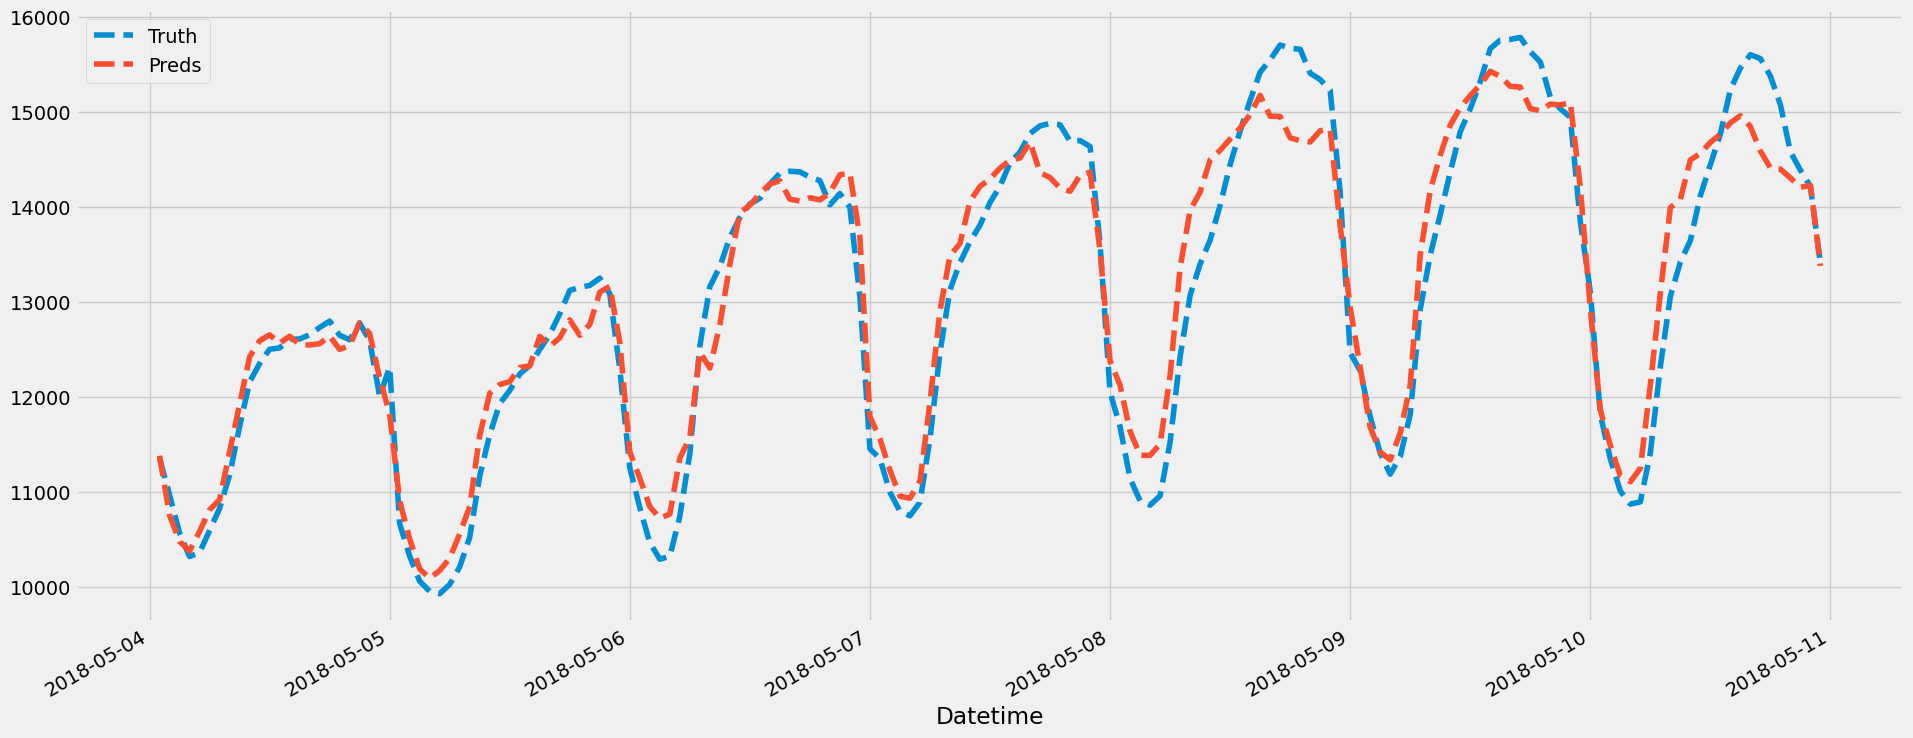

In [48]:
ax = test[(test.index>"05-04-2018")&(test.index<"05-11-2018")]['AEP_MW_x'].plot(style='--')
test[(test.index>"05-04-2018")&(test.index<"05-11-2018")]['Pred'].plot(ax=ax,style='--')
ax.legend(['Truth','Preds'])

# Indeed significant improvement over the previous plot

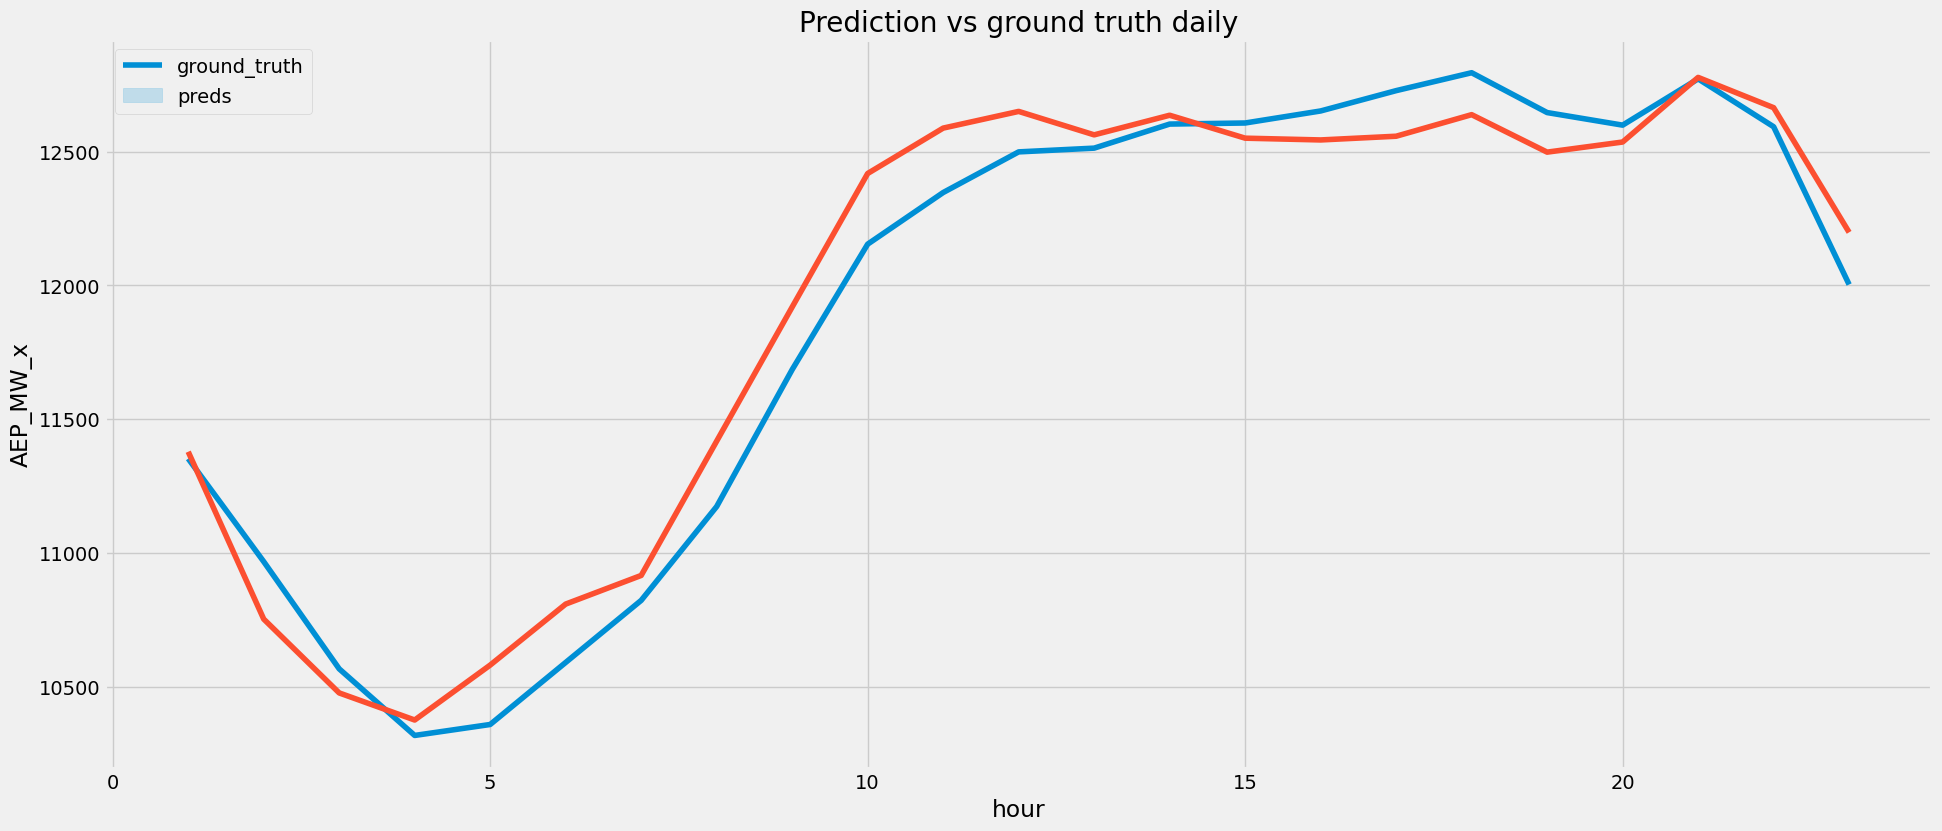

In [49]:
ax = sns.lineplot(test[(test.index>"05-04-2018")&(test.index<"05-05-2018")],x='hour',y='AEP_MW_x')
sns.lineplot(test[(test.index>"05-04-2018")&(test.index<"05-05-2018")],x='hour', y='Pred')
ax.set_title("Prediction vs ground truth daily")
ax.legend(['ground_truth','preds'])

<Axes: xlabel='Datetime'>

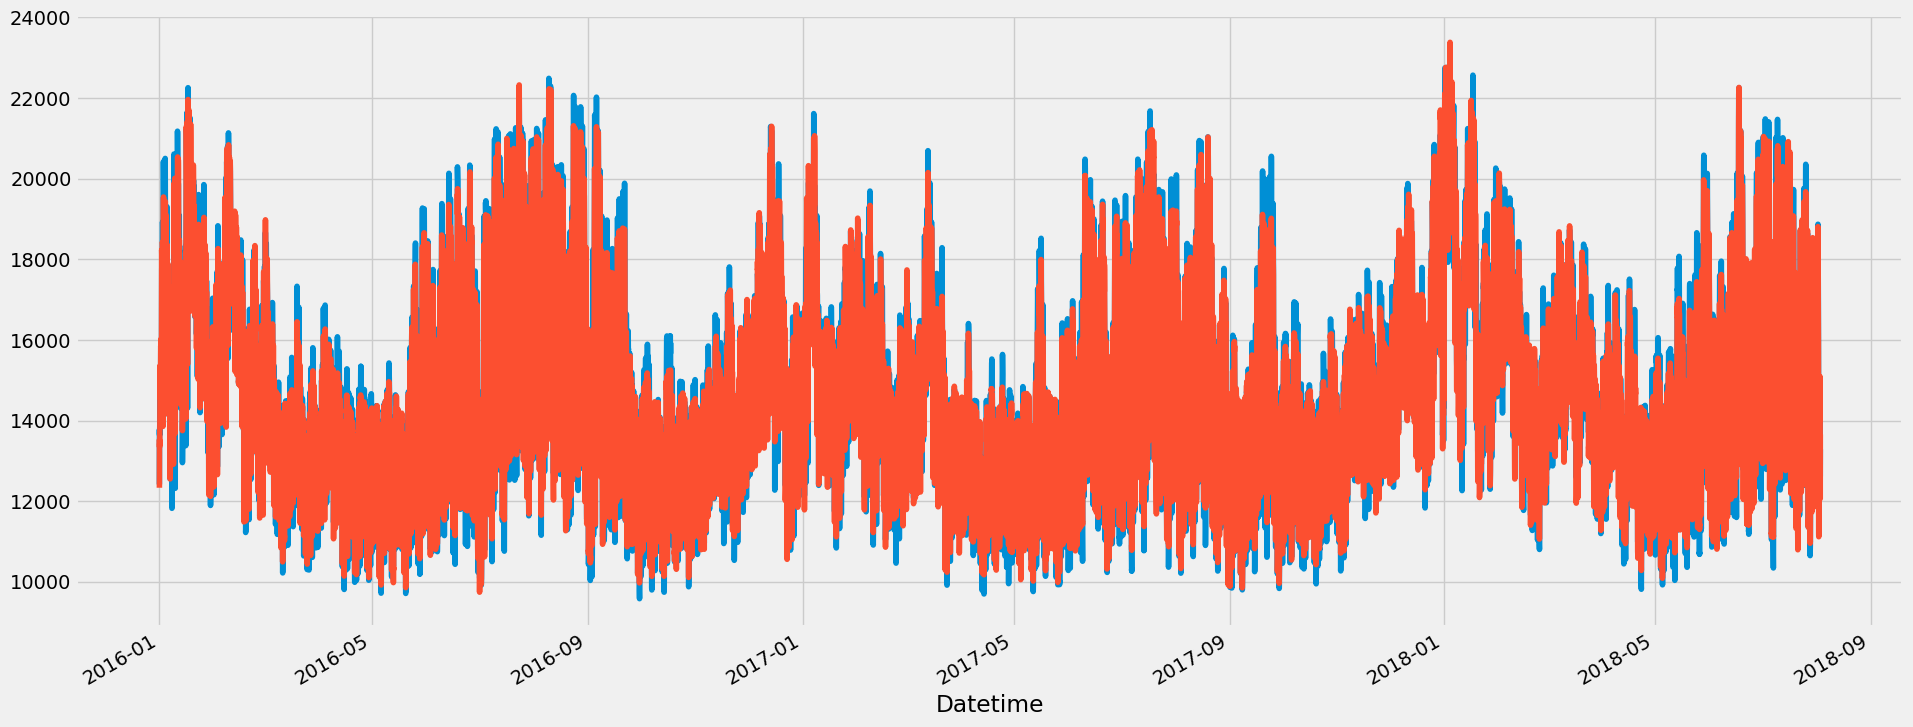

In [50]:
ax = test['AEP_MW_x'].plot()
test['Pred'].plot(ax=ax)


#Compared to the previous plots this is a significant improvement

In [51]:
#Now we will implement hourly or daily moving average
df_new['SMA1'] = df_new['AEP_MW_x'].rolling(24).mean()

In [52]:
#df_new.drop('SMA30',axis=1, inplace=True)
df_new.head(40)

key_0  AEP_MW_x  hour  day_of_the_week  quarter  \
Datetime                                                                    
2004-12-31 01:00:00  2004-12-31   13478.0     1                4        4   
2004-12-31 02:00:00  2004-12-31   12865.0     2                4        4   
2004-12-31 03:00:00  2004-12-31   12577.0     3                4        4   
2004-12-31 04:00:00  2004-12-31   12517.0     4                4        4   
2004-12-31 05:00:00  2004-12-31   12670.0     5                4        4   
2004-12-31 06:00:00  2004-12-31   13038.0     6                4        4   
2004-12-31 07:00:00  2004-12-31   13692.0     7                4        4   
2004-12-31 08:00:00  2004-12-31   14297.0     8                4        4   
2004-12-31 09:00:00  2004-12-31   14719.0     9                4        4   
2004-12-31 10:00:00  2004-12-31   14941.0    10                4        4   
2004-12-31 11:00:00  2004-12-31   15184.0    11                4        4   
2004-12-31 12:00:00  2004-12-31   15009.0    12                4        4   
2004-12-31 13:00:00  2004-12-31   14808.0    13                4        4   
2004-12-31 14:00:00  2004-12-31   14522.0    14                4        4   
2004-12-31 15:00:00  2004-12-31   14349.0    15                4        4   
2004-12-31 16:00:00  2004-12-31   14107.0    16                4        4   
2004-12-31 17:00:00  2004-12-31   14410.0    17                4        4   
2004-12-31 18:00:00  2004-12-31   15174.0    18                4        4   
2004-12-31 19:00:00  2004-12-31   15261.0    19                4        4   
2004-12-31 20:00:00  2004-12-31   14774.0    20                4        4   
2004-12-31 21:00:00  2004-12-31   14363.0    21                4        4   
2004-12-31 22:00:00  2004-12-31   14045.0    22                4        4   
2004-12-31 23:00:00  2004-12-31   13478.0    23                4        4   
2005-01-01 00:00:00  2004-12-31   14316.0     0                4        4   
2004-12-30 01:00:00  2005-01-01   12892.0     0                5        1   
2004-12-30 02:00:00  2005-01-01   12316.0     1                5        1   
2004-12-30 03:00:00  2005-01-01   11890.0     2                5        1   
2004-12-30 04:00:00  2005-01-01   11579.0     3                5        1   
2004-12-30 05:00:00  2005-01-01   11461.0     4                5        1   
2004-12-30 06:00:00  2005-01-01   11472.0     5                5        1   
2004-12-30 07:00:00  2005-01-01   11571.0     6                5        1   
2004-12-30 08:00:00  2005-01-01   11898.0     7                5        1   
2004-12-30 09:00:00  2005-01-01   12209.0     8                5        1   
2004-12-30 10:00:00  2005-01-01   12396.0     9                5        1   
2004-12-30 11:00:00  2005-01-01   12997.0    10                5        1   
2004-12-30 12:00:00  2005-01-01   13455.0    11                5        1   
2004-12-30 13:00:00  2005-01-01   13617.0    12                5        1   
2004-12-30 14:00:00  2005-01-01   13665.0    13                5        1   
2004-12-30 15:00:00  2005-01-01   13446.0    14                5        1   
2004-12-30 16:00:00  2005-01-01   13340.0    15                5        1   

                     year  day_of_year  month    Lag         D_AVG  \
Datetime                                                             
2004-12-31 01:00:00  2004          366     12    NaN  14108.083333   
2004-12-31 02:00:00  2004          366     12 -613.0  14108.083333   
2004-12-31 03:00:00  2004          366     12 -288.0  14108.083333   
2004-12-31 04:00:00  2004          366     12  -60.0  14108.083333   
2004-12-31 05:00:00  2004          366     12  153.0  14108.083333   
2004-12-31 06:00:00  2004          366     12  368.0  14108.083333   
2004-12-31 07:00:00  2004          366     12  654.0  14108.083333   
2004-12-31 08:00:00  2004          366     12  605.0  14108.083333   
2004-12-31 09:00:00  2004          366     12  422.0  14108.083333   
2004-12-31 10:00:00  

In [53]:
features = ['hour', 'day_of_the_week', 'quarter', 'year', 'day_of_year',
       'month', 'Lag','D_AVG','SMA1']
target = 'AEP_MW_x'
train = df_new.loc[df.index<'01-01-2016']
test = df_new.loc[df.index>='01-01-2016']
X_train, y_train, X_test, y_test = train[features],train[target],test[features],test[target]

In [54]:
model = xgb.XGBRegressor(n_estimators=5000,learning_rate=0.01,booster='gbtree')
model.fit(X_train,y_train,eval_set=[(X_test, y_test)], verbose=100, early_stopping_rounds=30)

[0]	validation_0-rmse:2607.21318


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:1309.55073
[200]	validation_0-rmse:873.59913
[300]	validation_0-rmse:710.25337
[400]	validation_0-rmse:642.26776
[500]	validation_0-rmse:605.80130
[600]	validation_0-rmse:579.64353
[700]	validation_0-rmse:558.53306
[800]	validation_0-rmse:545.38258
[900]	validation_0-rmse:535.09919
[1000]	validation_0-rmse:528.74465
[1100]	validation_0-rmse:523.12433
[1200]	validation_0-rmse:517.12190
[1300]	validation_0-rmse:512.12725
[1400]	validation_0-rmse:508.17648
[1500]	validation_0-rmse:504.91761
[1600]	validation_0-rmse:503.10325
[1700]	validation_0-rmse:499.59853
[1800]	validation_0-rmse:494.26635
[1900]	validation_0-rmse:492.74958
[2000]	validation_0-rmse:491.84209
[2100]	validation_0-rmse:489.87959
[2200]	validation_0-rmse:487.24468
[2300]	validation_0-rmse:486.00673
[2400]	validation_0-rmse:484.48589
[2500]	validation_0-rmse:483.20229
[2522]	validation_0-rmse:483.27113


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: >

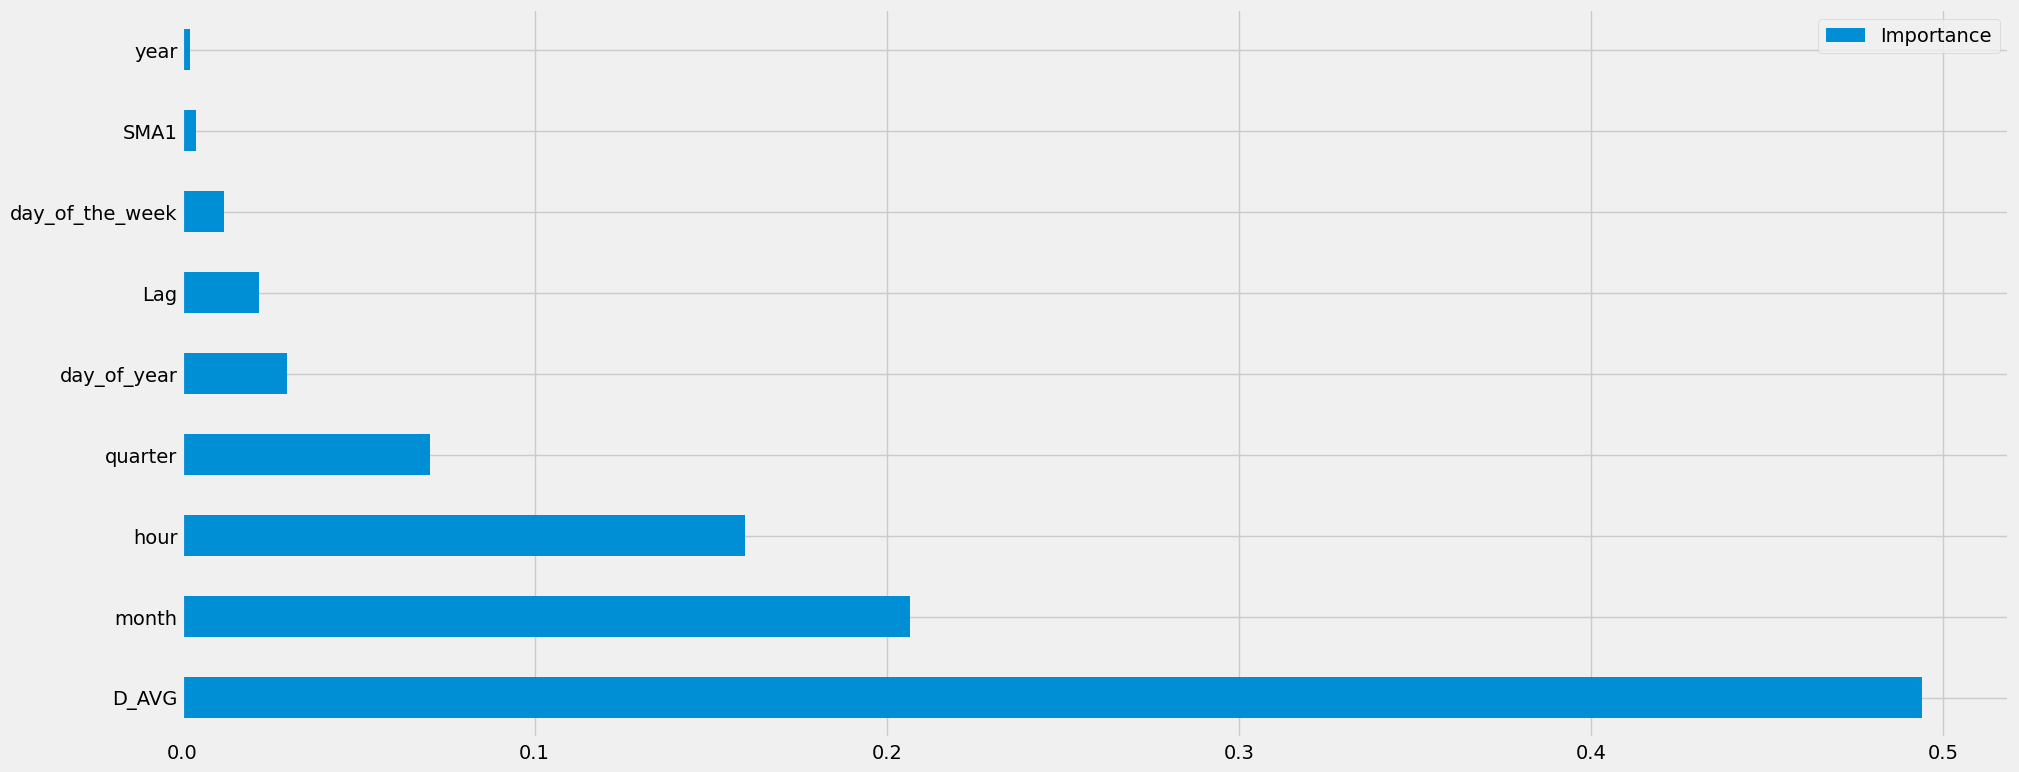

In [55]:
fi = pd.DataFrame(model.feature_importances_,index=model.feature_names_in_,columns=['Importance']).sort_values(by='Importance',ascending=False)

## Clearly the moving average plays a crucial role 

fi.plot(kind='barh')

/tmp/ipykernel_42/3344028980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = model.predict(X_test)


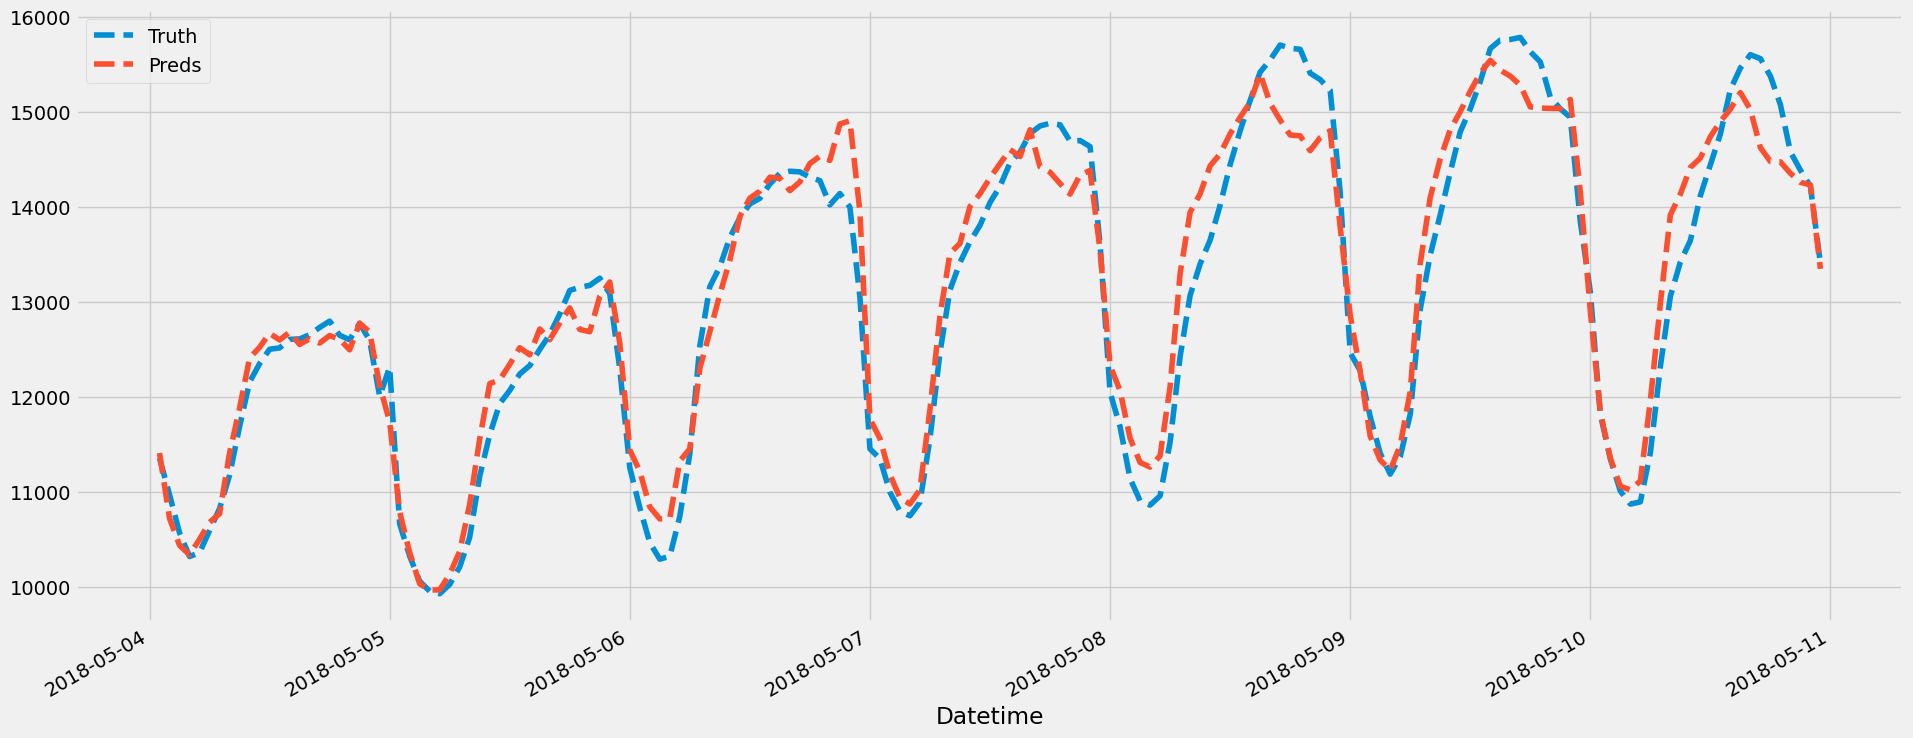

In [56]:
test['Pred'] = model.predict(X_test)
ax = test[(test.index>"05-04-2018")&(test.index<"05-11-2018")]['AEP_MW_x'].plot(style='--')
test[(test.index>"05-04-2018")&(test.index<"05-11-2018")]['Pred'].plot(ax=ax,style='--')
ax.legend(['Truth','Preds'])

# Indeed significant improvement over the previous plot

In [110]:
df = pd.read_csv('/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv')


In [111]:
df.set_index('Datetime', inplace=True)

In [112]:
df.index = pd.to_datetime(df.index)

<Axes: xlabel='Datetime'>

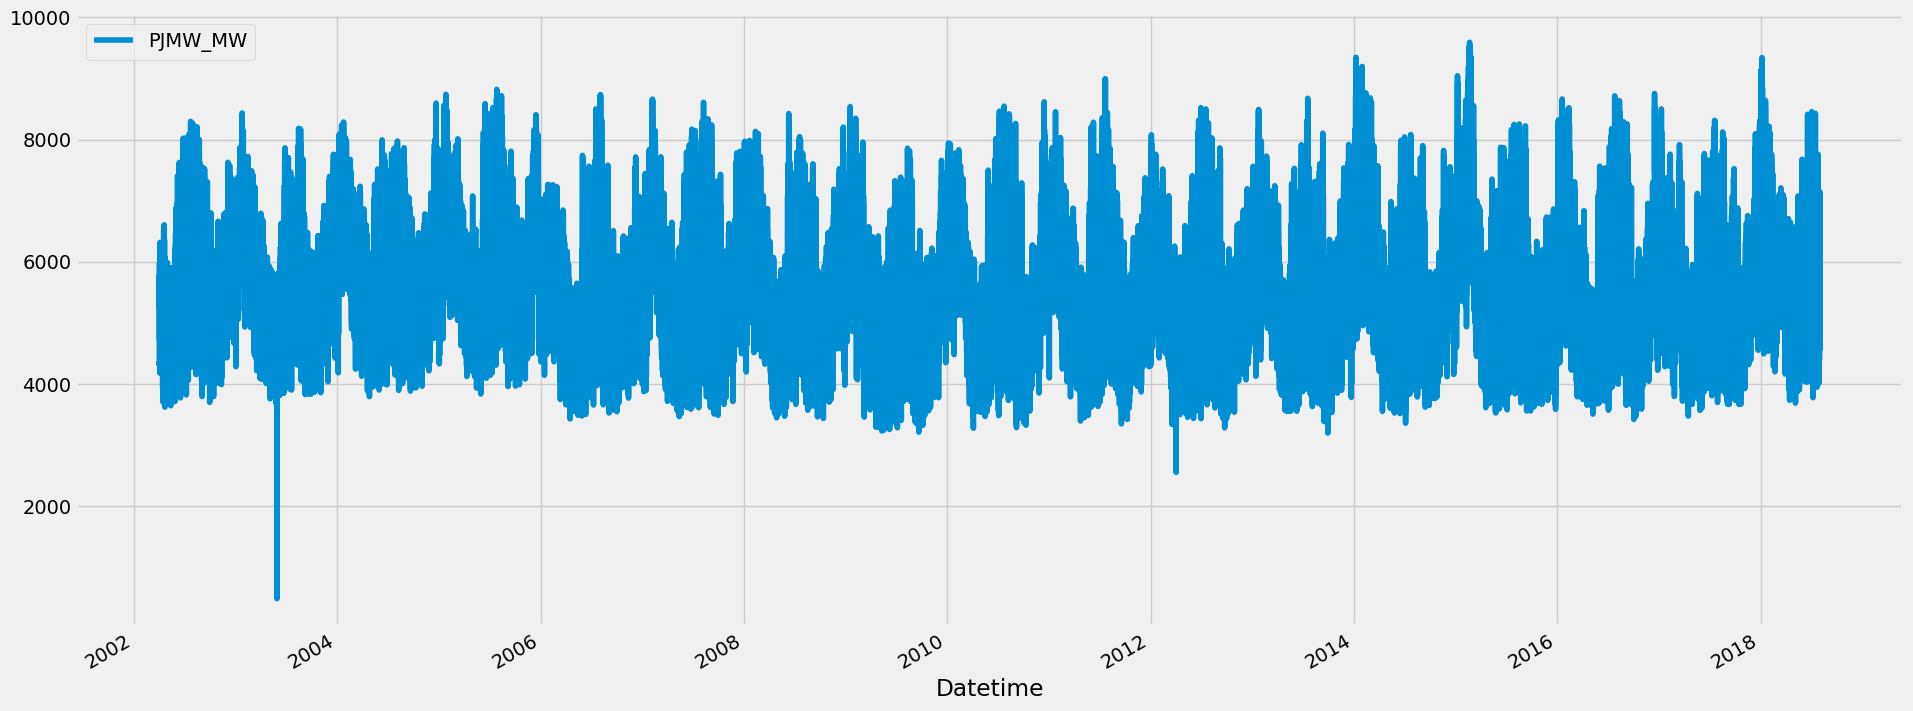

In [113]:
df.plot()

## Outlier detection and removal

<Axes: ylabel='Frequency'>

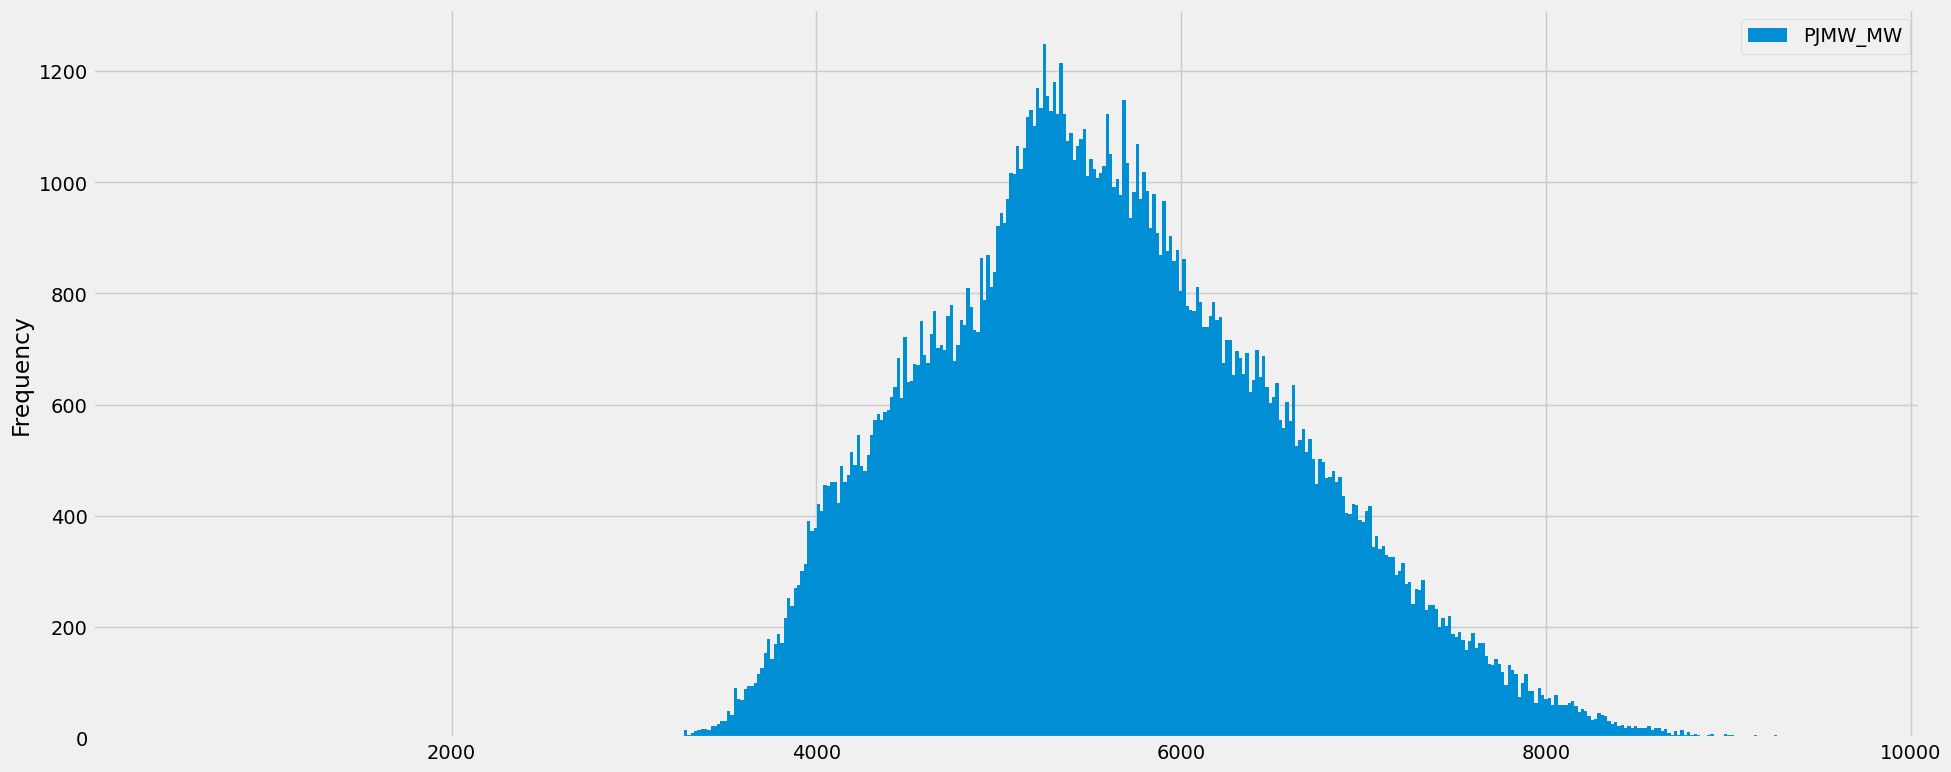

In [61]:
df.plot(kind='hist', bins=500)

<Axes: xlabel='Datetime'>

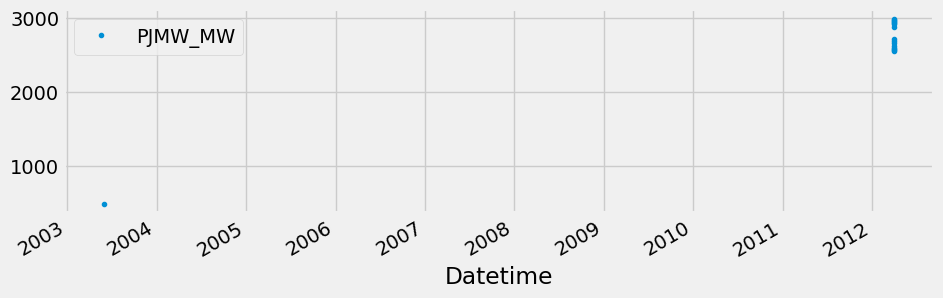

In [62]:
df.query('PJMW_MW < 3000').plot(figsize=(10,3), style='.')

<Axes: xlabel='Datetime'>

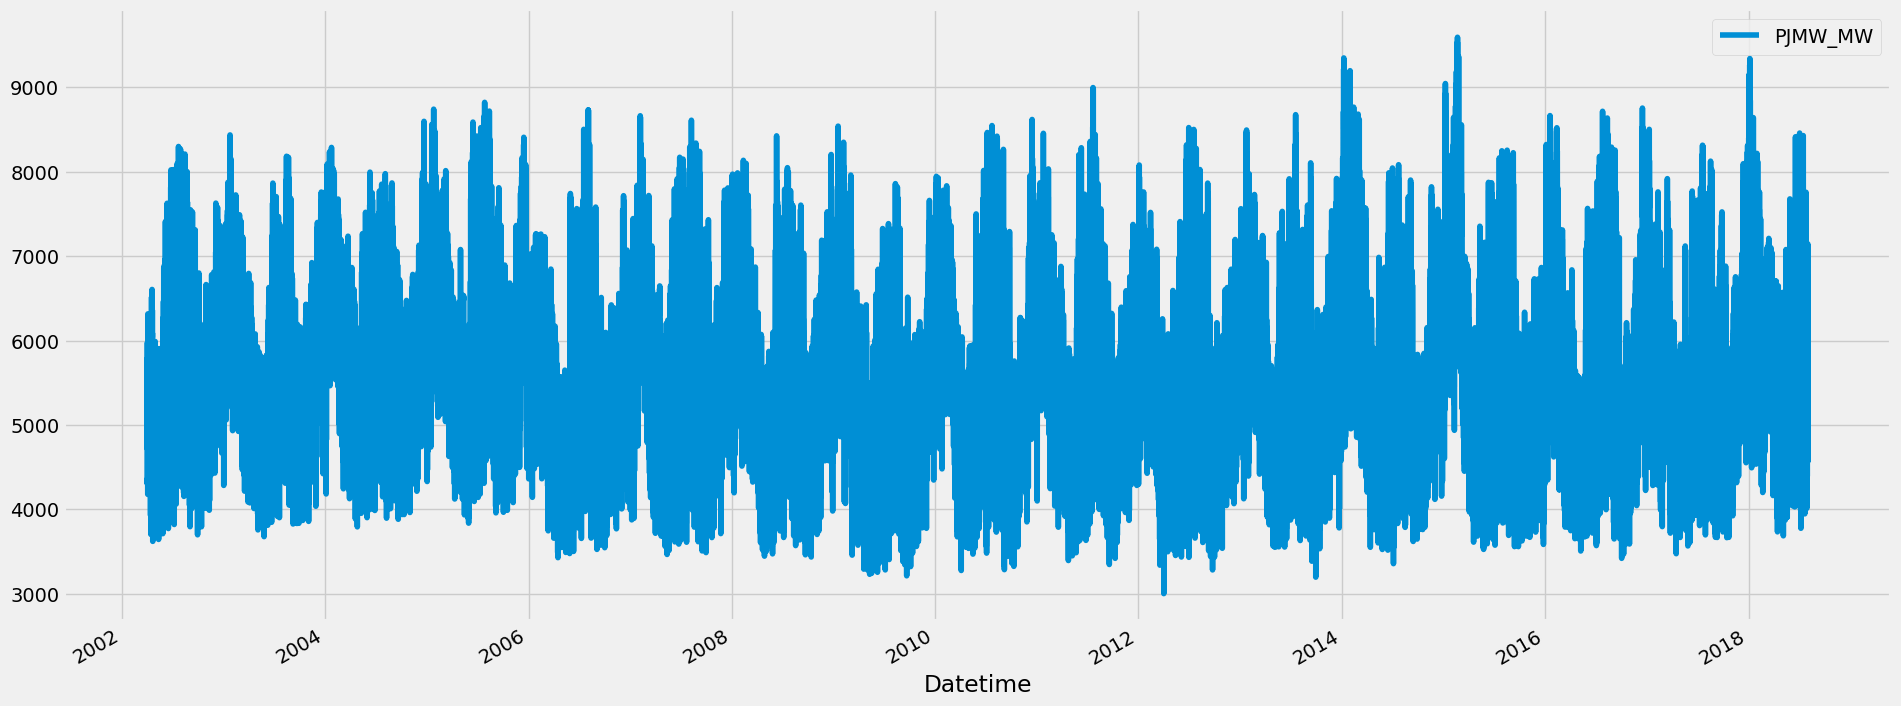

In [114]:
df = df.query('PJMW_MW > 3000').copy()
df.plot()

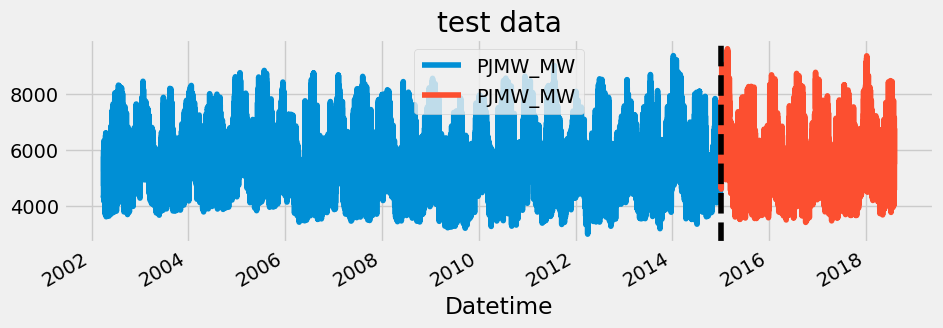

In [115]:
train = df[df.index<'01-01-2015']
test = df[df.index >'01-01-2015']

fig, ax = plt.subplots(figsize=(10,3))
train.plot(ax=ax,title='Training Data')

test.plot(ax=ax,title="test data")
plt.axvline('01-01-2015',color='k', ls='--')

In [116]:
df = create_timesects(df)

In [117]:
df.head()

PJMW_MW  hour  day_of_the_week  quarter  year  \
Datetime                                                             
2002-12-31 01:00:00   5077.0     1                1        4  2002   
2002-12-31 02:00:00   4939.0     2                1        4  2002   
2002-12-31 03:00:00   4885.0     3                1        4  2002   
2002-12-31 04:00:00   4857.0     4                1        4  2002   
2002-12-31 05:00:00   4930.0     5                1        4  2002   

                     day_of_year  month  
Datetime                                 
2002-12-31 01:00:00          365     12  
2002-12-31 02:00:00          365     12  
2002-12-31 03:00:00          365     12  
2002-12-31 04:00:00          365     12  
2002-12-31 05:00:00          365     12

In [118]:
#Previoiusly the daily average was very helpfule and hence we will add it here too

df_da = df.groupby(df.index.date)['PJMW_MW'].mean()
df_1 = pd.merge(df,df_da,left_on=df.index.date,how='right', right_on=df_da.index)

In [119]:
df_1.rename(columns={'PJMW_MW_y':"D_AVG"},inplace=True)

In [120]:
df_1.set_index(df.index, inplace=True)

In [121]:
df_1.drop('key_0', axis=1, inplace=True)
df_1.head()

PJMW_MW_x  hour  day_of_the_week  quarter  year  \
Datetime                                                               
2002-12-31 01:00:00     4374.0     1                0        2  2002   
2002-12-31 02:00:00     4306.0     2                0        2  2002   
2002-12-31 03:00:00     4322.0     3                0        2  2002   
2002-12-31 04:00:00     4359.0     4                0        2  2002   
2002-12-31 05:00:00     4436.0     5                0        2  2002   

                     day_of_year  month        D_AVG  
Datetime                                              
2002-12-31 01:00:00           91      4  5271.173913  
2002-12-31 02:00:00           91      4  5271.173913  
2002-12-31 03:00:00           91      4  5271.173913  
2002-12-31 04:00:00           91      4  5271.173913  
2002-12-31 05:00:00           91      4  5271.173913

## Time Series Cross-Validation

In [122]:
from sklearn.model_selection import TimeSeriesSplit

In [123]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df_1 = df_1.sort_index()

In [124]:
df_1.head()

PJMW_MW_x  hour  day_of_the_week  quarter  year  \
Datetime                                                               
2002-04-01 01:00:00     4939.0     2                1        4  2002   
2002-04-01 02:00:00     4885.0     3                1        4  2002   
2002-04-01 03:00:00     4857.0     4                1        4  2002   
2002-04-01 04:00:00     4930.0     5                1        4  2002   
2002-04-01 05:00:00     5126.0     6                1        4  2002   

                     day_of_year  month        D_AVG  
Datetime                                              
2002-04-01 01:00:00          365     12  5511.583333  
2002-04-01 02:00:00          365     12  5511.583333  
2002-04-01 03:00:00          365     12  5511.583333  
2002-04-01 04:00:00          365     12  5511.583333  
2002-04-01 05:00:00          365     12  5511.583333

In [125]:
for train_idx, test_idx in tss.split(df):
    break

train_idx,test_idx

(array([    0,     1,     2, ..., 99363, 99364, 99365]),
 array([ 99390,  99391,  99392, ..., 108147, 108148, 108149]))

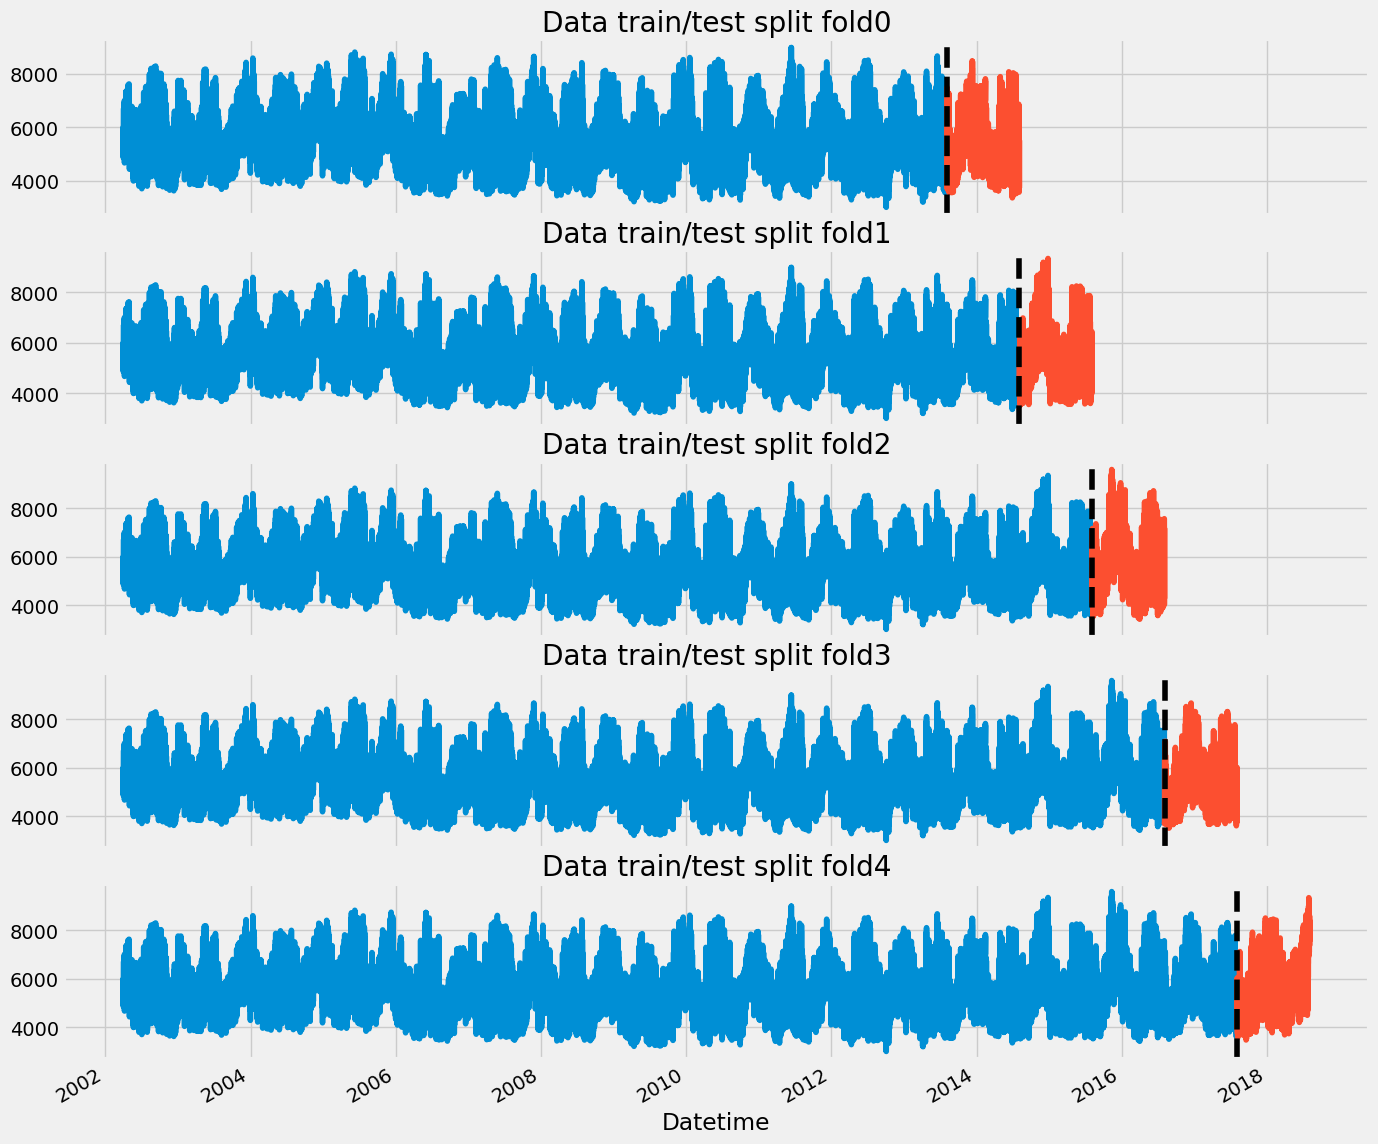

In [126]:
fig, axs = plt.subplots(5,1, figsize=(15,15), sharex= True)

fold=0
for train_idx, val_idx in tss.split(df_1):
    train = df_1.iloc[train_idx]
    test = df_1.iloc[val_idx]
    train['PJMW_MW_x'].plot(ax=axs[fold],
                         label='Traininng Set',
                         title=f'Data Trian/test split fold{fold}')
    test['PJMW_MW_x'].plot(ax=axs[fold], label='Test set', title=f'Data train/test split fold{fold}')
    axs[fold].axvline(test.index.min(), color='k', ls='--')
    fold+=1


## Forecasting Horizon explained

In [127]:
df_1.head()

PJMW_MW_x  hour  day_of_the_week  quarter  year  \
Datetime                                                               
2002-04-01 01:00:00     4939.0     2                1        4  2002   
2002-04-01 02:00:00     4885.0     3                1        4  2002   
2002-04-01 03:00:00     4857.0     4                1        4  2002   
2002-04-01 04:00:00     4930.0     5                1        4  2002   
2002-04-01 05:00:00     5126.0     6                1        4  2002   

                     day_of_year  month        D_AVG  
Datetime                                              
2002-04-01 01:00:00          365     12  5511.583333  
2002-04-01 02:00:00          365     12  5511.583333  
2002-04-01 03:00:00          365     12  5511.583333  
2002-04-01 04:00:00          365     12  5511.583333  
2002-04-01 05:00:00          365     12  5511.583333

## Lag Features

In [128]:
target_map = df_1['PJMW_MW_x'].to_dict()

In [129]:
df_1['Lag1'] = (df_1.index - pd.Timedelta('364 days')).map(target_map)

df_1['Lag2'] = (df_1.index - pd.Timedelta('728 days')).map(target_map)
df_1['Lag3'] = (df_1.index - pd.Timedelta('1092 days')).map(target_map)

In [130]:
df_1.head()

PJMW_MW_x  hour  day_of_the_week  quarter  year  \
Datetime                                                               
2002-04-01 01:00:00     4939.0     2                1        4  2002   
2002-04-01 02:00:00     4885.0     3                1        4  2002   
2002-04-01 03:00:00     4857.0     4                1        4  2002   
2002-04-01 04:00:00     4930.0     5                1        4  2002   
2002-04-01 05:00:00     5126.0     6                1        4  2002   

                     day_of_year  month        D_AVG  Lag1  Lag2  Lag3  
Datetime                                                                
2002-04-01 01:00:00          365     12  5511.583333   NaN   NaN   NaN  
2002-04-01 02:00:00          365     12  5511.583333   NaN   NaN   NaN  
2002-04-01 03:00:00          365     12  5511.583333   NaN   NaN   NaN  
2002-04-01 04:00:00          365     12  5511.583333   NaN   NaN   NaN  
2002-04-01 05:00:00          365     12  5511.583333   NaN   NaN   NaN

In [131]:
def add_lags(df):
    df['Lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['Lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['Lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

<Axes: xlabel='Datetime'>

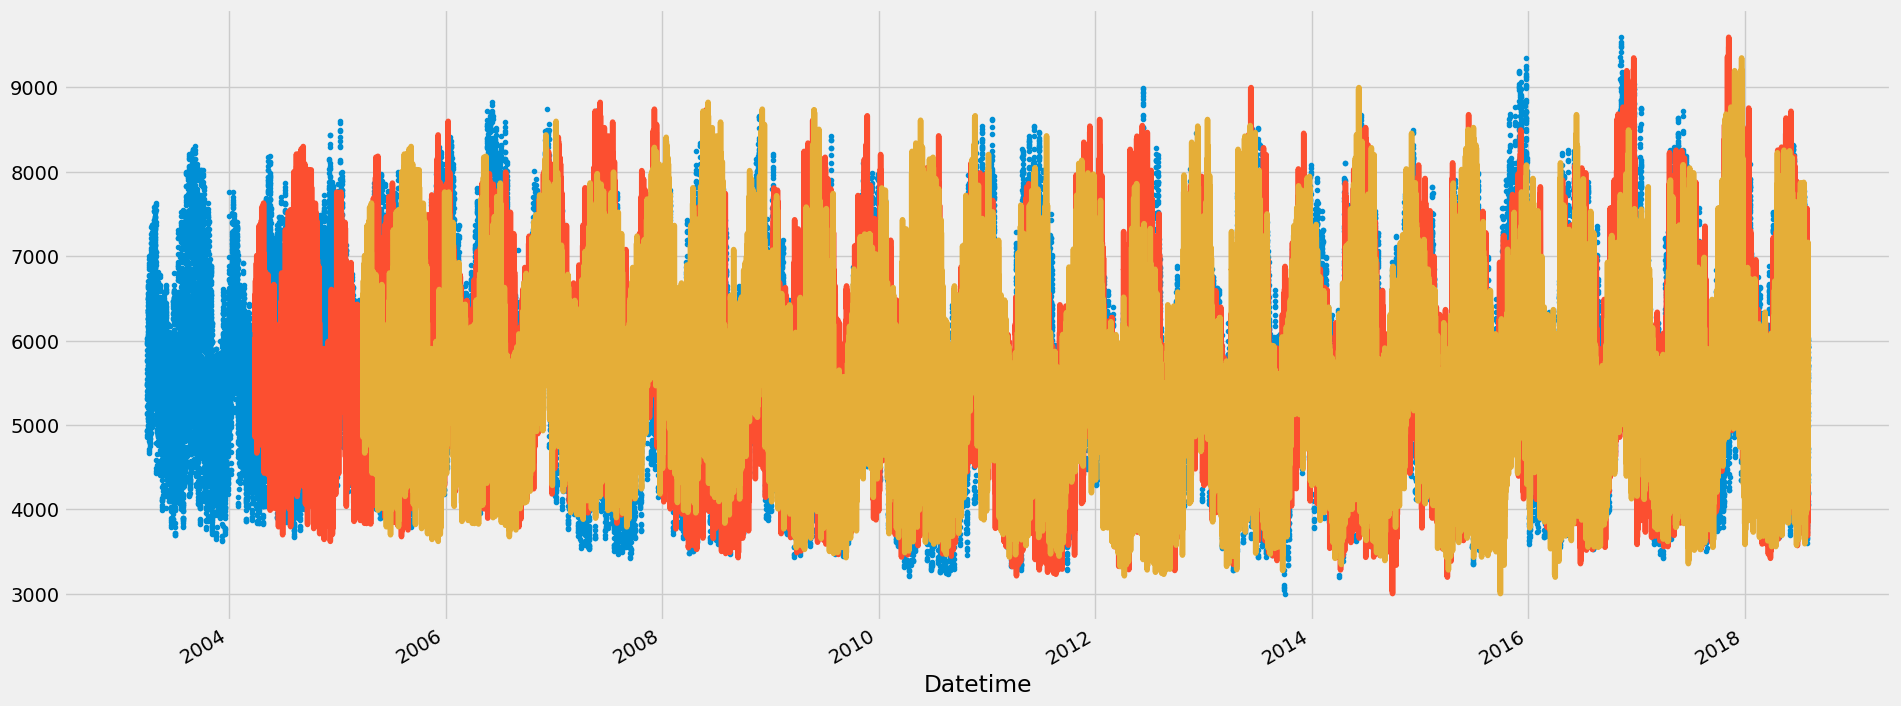

In [133]:
fig, ax = plt.subplots()
df_1['Lag1'].plot(ax=ax, style='.')
df_1['Lag2'].plot(ax=ax)
df_1['Lag3'].plot(ax=ax)

## Train Using cross validation

In [134]:
df_1.columns

Index(['PJMW_MW_x', 'hour', 'day_of_the_week', 'quarter', 'year',
       'day_of_year', 'month', 'D_AVG', 'Lag1', 'Lag2', 'Lag3'],
      dtype='object')

In [186]:
tss = TimeSeriesSplit(n_splits = 5, test_size=24*365*1, gap=24)
df_1  = df_1.sort_index()

fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df_1):
    train = df_1.iloc[train_idx]
    test = df_1.iloc[val_idx]
    
    
    train = create_timesects(train)
    test = create_timesects(test)
    
    
    FEATURES = ['hour', 'day_of_the_week', 'quarter', 'year',
       'day_of_year', 'month', 'Lag1', 'Lag2', 'Lag3']
    
    TARGET = 'PJMW_MW_x'
    
    
    X_train = train[FEATURES]
    y_train = train[TARGET]
    
    X_test = train[FEATURES]
    y_test = train[TARGET]
    
    
    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                          n_estimators=1000,
                          objective='reg:linear',
                          max_depth=3,
                          learning_rate=0.01)
    reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
           verbose=100)
    
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:5617.61439	validation_1-rmse:5617.61439


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:31:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:2162.02868	validation_1-rmse:2162.02868
[200]	validation_0-rmse:1012.17912	validation_1-rmse:1012.17912
[300]	validation_0-rmse:712.31002	validation_1-rmse:712.31002
[400]	validation_0-rmse:645.82293	validation_1-rmse:645.82293
[500]	validation_0-rmse:626.45844	validation_1-rmse:626.45844
[600]	validation_0-rmse:615.38535	validation_1-rmse:615.38535
[700]	validation_0-rmse:607.05302	validation_1-rmse:607.05302
[800]	validation_0-rmse:600.62458	validation_1-rmse:600.62458
[900]	validation_0-rmse:593.78843	validation_1-rmse:593.78843
[999]	validation_0-rmse:587.53343	validation_1-rmse:587.53343
[0]	validation_0-rmse:5614.46769	validation_1-rmse:5614.46769


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:32:06] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:2160.86772	validation_1-rmse:2160.86772
[200]	validation_0-rmse:1014.08886	validation_1-rmse:1014.08886
[300]	validation_0-rmse:717.54923	validation_1-rmse:717.54923


KeyboardInterrupt: 

In [187]:
df_1.tail()

PJMW_MW_x  hour  day_of_the_week  quarter  year  \
Datetime                                                               
2018-08-02 20:00:00     8401.0    20                0        1  2018   
2018-08-02 21:00:00     8373.0    21                0        1  2018   
2018-08-02 22:00:00     8238.0    22                0        1  2018   
2018-08-02 23:00:00     7958.0    23                0        1  2018   
2018-08-03 00:00:00     7531.0     1                1        1  2018   

                     day_of_year  month        D_AVG    Lag1    Lag2    Lag3  \
Datetime                                                                       
2018-08-02 20:00:00            1      1  7735.166667  5144.0  4842.0  5917.0   
2018-08-02 21:00:00            1      1  7735.166667  4681.0  5221.0  5374.0   
2018-08-02 22:00:00            1      1  7735.166667  4411.0  4183.0  4843.0   
2018-08-02 23:00:00            1      1  7735.166667  4210.0  3953.0  4510.0   
2018-08-03 00:00:00            2      1  8044.833333  4102.0  3836.0  4358.0   

                     is_fut  
Datetime                     
2018-08-02 20:00:00   False  
2018-08-02 21:00:00   False  
2018-08-02 22:00:00   False  
2018-08-02 23:00:00   False  
2018-08-03 00:00:00   False

In [188]:
print(f'SCore across folds: {np.mean(scores):0.4f}')
print(f"fold scores: {scores}")

SCore across folds: 587.5334
fold scores: [587.5334336098186]


In [189]:
# Train using all of the data

X_all = df_1[FEATURES]
y_all = df_1[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                          n_estimators=3000,
                          max_depth=3,
                          learning_rate=0.03)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
           verbose=100)
    

[0]	validation_0-rmse:5503.02896	validation_1-rmse:5503.02896
[100]	validation_0-rmse:712.36376	validation_1-rmse:712.36376
[200]	validation_0-rmse:621.94256	validation_1-rmse:621.94256
[300]	validation_0-rmse:603.31936	validation_1-rmse:603.31936
[400]	validation_0-rmse:588.14674	validation_1-rmse:588.14674
[500]	validation_0-rmse:575.18371	validation_1-rmse:575.18371
[600]	validation_0-rmse:566.48757	validation_1-rmse:566.48757
[700]	validation_0-rmse:559.59322	validation_1-rmse:559.59322
[800]	validation_0-rmse:553.21494	validation_1-rmse:553.21494
[900]	validation_0-rmse:547.82315	validation_1-rmse:547.82315
[1000]	validation_0-rmse:542.75810	validation_1-rmse:542.75810
[1100]	validation_0-rmse:537.87054	validation_1-rmse:537.87054
[1200]	validation_0-rmse:533.55723	validation_1-rmse:533.55723
[1300]	validation_0-rmse:529.58697	validation_1-rmse:529.58697
[1400]	validation_0-rmse:526.24979	validation_1-rmse:526.24979
[1500]	validation_0-rmse:522.60127	validation_1-rmse:522.60127
[1

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [190]:
df_1.index.max()

Timestamp('2018-08-03 00:00:00')

In [191]:
# Creat future dataframe

future = pd.date_range('2018-08-03','2019-08-01',freq='1h')
future_df = pd.DataFrame(index=future)

In [192]:
future_df.head()

Empty DataFrame
Columns: []
Index: [2018-08-03 00:00:00, 2018-08-03 01:00:00, 2018-08-03 02:00:00, 2018-08-03 03:00:00, 2018-08-03 04:00:00]

In [193]:
df_future = pd.concat([df_1, future_df])
#create_timesects(df_future)

In [194]:
# stick the data to the existing data

future_df['is_fut'] = True
df_1['is_fut'] = False

df_future = pd.concat([df_1, future_df])
df_future = create_timesects(df_future)
df_future = add_lags(df_future)
df_future.drop('D_AVG',axis=1, inplace=True)  #Done to reduce overfitting
df_future.head()

PJMW_MW_x  hour  day_of_the_week  quarter  year  \
2002-04-01 01:00:00     4939.0     1                0        2  2002   
2002-04-01 02:00:00     4885.0     2                0        2  2002   
2002-04-01 03:00:00     4857.0     3                0        2  2002   
2002-04-01 04:00:00     4930.0     4                0        2  2002   
2002-04-01 05:00:00     5126.0     5                0        2  2002   

                     day_of_year  month  Lag1  Lag2  Lag3  is_fut  
2002-04-01 01:00:00           91      4   NaN   NaN   NaN   False  
2002-04-01 02:00:00           91      4   NaN   NaN   NaN   False  
2002-04-01 03:00:00           91      4   NaN   NaN   NaN   False  
2002-04-01 04:00:00           91      4   NaN   NaN   NaN   False  
2002-04-01 05:00:00           91      4   NaN   NaN   NaN   False

In [195]:
df_future.tail()

PJMW_MW_x  hour  day_of_the_week  quarter  year  \
2019-07-31 20:00:00        NaN    20                2        3  2019   
2019-07-31 21:00:00        NaN    21                2        3  2019   
2019-07-31 22:00:00        NaN    22                2        3  2019   
2019-07-31 23:00:00        NaN    23                2        3  2019   
2019-08-01 00:00:00        NaN     0                3        3  2019   

                     day_of_year  month    Lag1    Lag2    Lag3  is_fut  
2019-07-31 20:00:00          212      7  8563.0  5106.0  5310.0    True  
2019-07-31 21:00:00          212      7  8322.0  4719.0  4479.0    True  
2019-07-31 22:00:00          212      7  8011.0  4362.0  4395.0    True  
2019-07-31 23:00:00          212      7  7691.0  4197.0  4202.0    True  
2019-08-01 00:00:00          213      8  7742.0  4064.0  4066.0    True

In [196]:
df_future.query('is_fut').copy()

PJMW_MW_x  hour  day_of_the_week  quarter  year  \
2018-08-03 00:00:00        NaN     0                4        3  2018   
2018-08-03 01:00:00        NaN     1                4        3  2018   
2018-08-03 02:00:00        NaN     2                4        3  2018   
2018-08-03 03:00:00        NaN     3                4        3  2018   
2018-08-03 04:00:00        NaN     4                4        3  2018   
...                        ...   ...              ...      ...   ...   
2019-07-31 20:00:00        NaN    20                2        3  2019   
2019-07-31 21:00:00        NaN    21                2        3  2019   
2019-07-31 22:00:00        NaN    22                2        3  2019   
2019-07-31 23:00:00        NaN    23                2        3  2019   
2019-08-01 00:00:00        NaN     0                3        3  2019   

                     day_of_year  month    Lag1    Lag2    Lag3  is_fut  
2018-08-03 00:00:00          215      8  4102.0  3836.0  4358.0    True  
2018-08-03 01:00:00          215      8  3968.0  4133.0  4499.0    True  
2018-08-03 02:00:00          215      8  4057.0  4083.0  4587.0    True  
2018-08-03 03:00:00          215      8  4306.0  4086.0  4779.0    True  
2018-08-03 04:00:00          215      8  4547.0  4091.0  5176.0    True  
...                          ...    ...     ...     ...     ...     ...  
2019-07-31 20:00:00          212      7  8563.0  5106.0  5310.0    True  
2019-07-31 21:00:00          212      7  8322.0  4719.0  4479.0    True  
2019-07-31 22:00:00          212      7  8011.0  4362.0  4395.0    True  
2019-07-31 23:00:00          212      7  7691.0  4197.0  4202.0    True  
2019-08-01 00:00:00          213      8  7742.0  4064.0  4066.0    True  

[8713 rows x 11 columns]

In [197]:
FEATURES = ['hour',
 'day_of_the_week',
 'quarter',
 'year',
 'day_of_year',
 'month',
 'Lag1',
 'Lag2',
 'Lag3']

In [198]:
df_future['Pred'] = reg.predict(df_future[FEATURES])

<Axes: title={'center': 'Future Prediction'}>

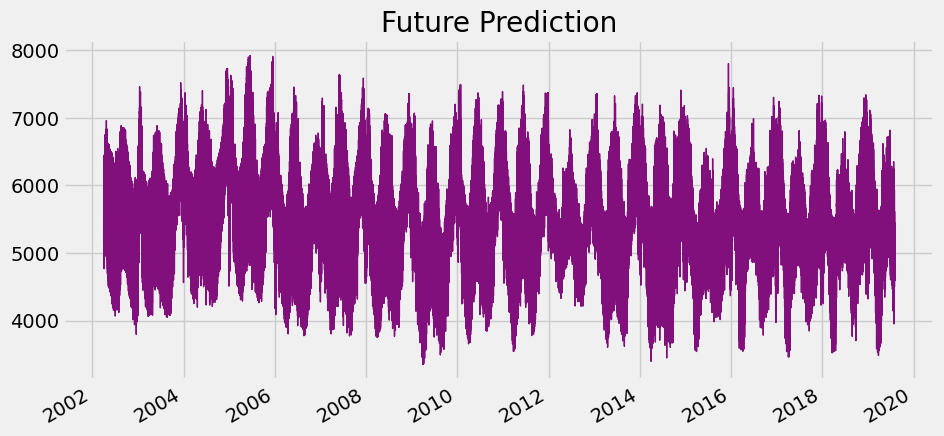

In [199]:
df_future["Pred"].plot(figsize=(10,5), color=cpal[5], ms=1, lw=1, title='Future Prediction')

In [200]:
#save model

reg.save_model('model.json')

reg_new = xgb.XGBRegressor()


In [202]:
# Following is just a short trial and not part of the rest of the code

## Model Prediction using NIXTLA

In [11]:
!pip install mlforecast

!pip install statsforecast

  Obtaining dependency information for mlforecast from https://files.pythonhosted.org/packages/2d/06/8b6ebd2be93a27b75a380af363156d52aad5b77929f65d9bd5a958ef894b/mlforecast-0.11.3-py3-none-any.whl.metadata
  Obtaining dependency information for utilsforecast>=0.0.22 from https://files.pythonhosted.org/packages/76/94/647546980fe6e806751584968f41ce7a4af11fd7fd638acdf597fe32fb1e/utilsforecast-0.0.23-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.3 MB/s eta 0:00:00
  Obtaining dependency information for statsforecast from https://files.pythonhosted.org/packages/9a/bd/0c15893664705c379e4ca9068ad07a83f9d4e754465c6a425a99911d84ed/statsforecast-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for fugue>=0.8.1 from https://files.pythonhosted.org/packages/ae/47/d3449da0b9cad85a361bc1003554710a5b612cf60bc2840096e93e5cdbb3/fugue-0.8.7-py3-none-any.whl.metadata
  Obtaining dependency information for triad>=0.9.3 from https://files.pythonhosted

In [47]:
# we will use the previous dataset
df = pd.read_csv('/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv')

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
#df = df.rename(columns={'Datetime':'ds','PJMW_MW':'y'})
df['unique_id'] = 'PJMW_hourly'
df.head()

ds       y    unique_id
0 2002-12-31 01:00:00  5077.0  PJMW_hourly
1 2002-12-31 02:00:00  4939.0  PJMW_hourly
2 2002-12-31 03:00:00  4885.0  PJMW_hourly
3 2002-12-31 04:00:00  4857.0  PJMW_hourly
4 2002-12-31 05:00:00  4930.0  PJMW_hourly

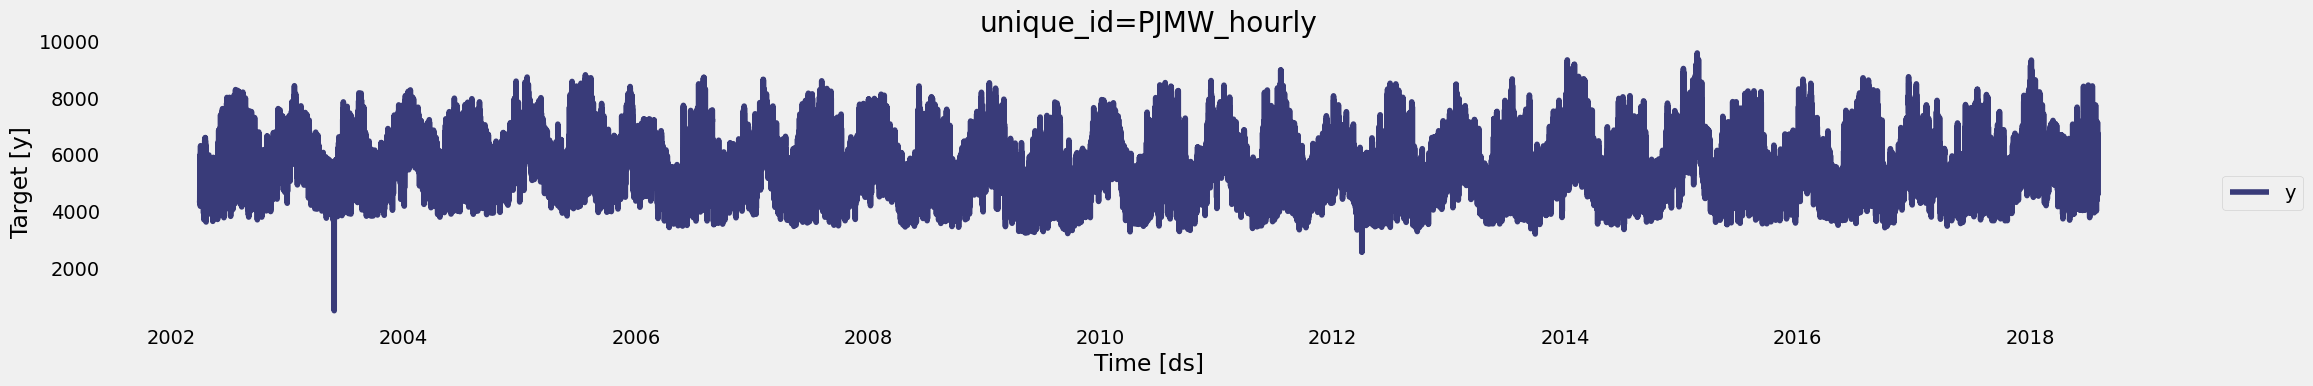

In [48]:
#df.set_index('ds',inplace=True)
from statsforecast import StatsForecast
StatsForecast.plot(df)

<Axes: xlabel='ds'>

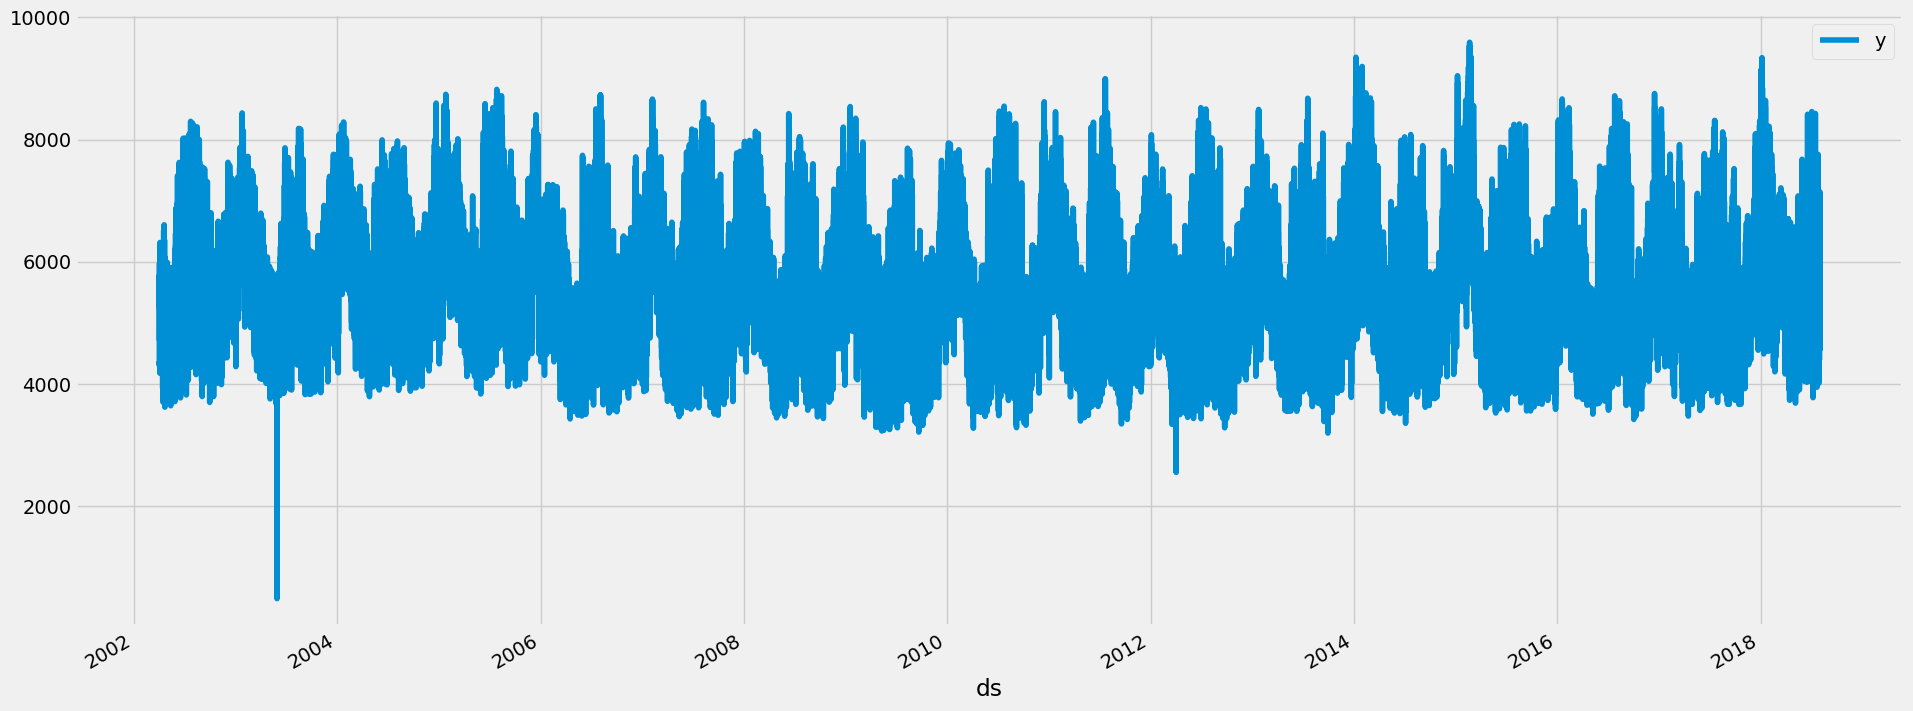

In [49]:
df.plot(x='ds', y='y')

In [50]:
"""MSTL model
The MSTL (Multiple Seasonal-Trend decomposition using LOESS) model
originally developed by Kasun Bandara, Rob J Hyndman and Christoph Bergmeir, 
decomposes the time series in multiple seasonalities using a Local 
Polynomial Regression (LOESS). Then it forecasts the trend using a 
custom non-seasonal model and each seasonality using a SeasonalNaive model.
"""

from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA, SeasonalNaive


mstl = MSTL(season_length=[24,24*7],
           trend_forecaster=AutoARIMA())

In [51]:
sf = StatsForecast(models=[mstl], freq='H')

In [52]:
# fit the model

sf = sf.fit(df=df)
sf

StatsForecast(models=[MSTL])

In [53]:
sf.fitted_[0,0].model_

data        trend  seasonal24  seasonal168   remainder
0       4374.0  5338.726048 -584.134808  -272.176960 -108.414280
1       4306.0  5338.819771 -678.295751  -234.453289 -120.070732
2       4322.0  5338.912526 -709.939089  -192.663165 -114.310272
3       4359.0  5339.004272 -687.031003  -162.953343 -130.019926
4       4436.0  5339.094970 -592.797394   -79.193162 -231.104413
...        ...          ...         ...          ...         ...
143201  6545.0  5680.935210  789.019096   294.692214 -219.646521
143202  6496.0  5680.627705  635.176990   273.753366  -93.558060
143203  6325.0  5680.322564  460.701227   261.843902  -77.867693
143204  5892.0  5680.019778   44.443000   189.041331  -21.504110
143205  5489.0  5679.719338 -406.758087   210.024540    6.014209

[143206 rows x 5 columns]

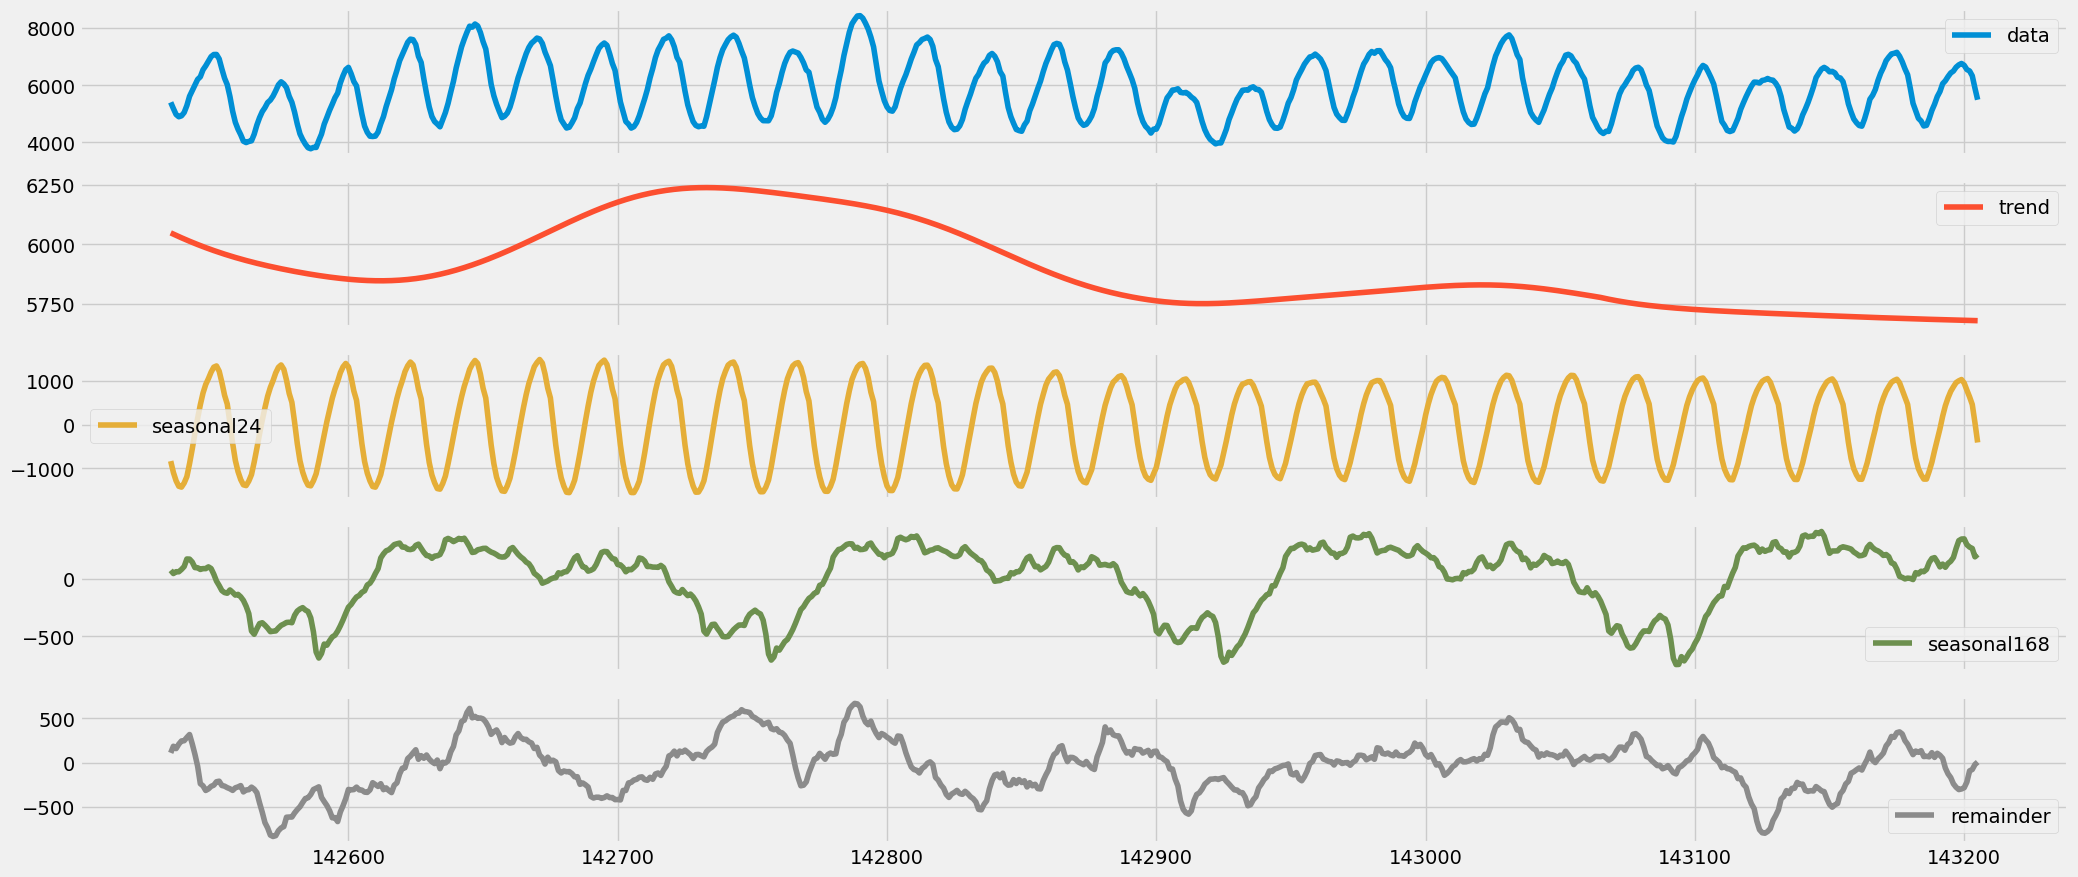

In [54]:
sf.fitted_[0,0].model_.tail(24 * 28).plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()

In [55]:
sf

StatsForecast(models=[MSTL])

In [65]:
# create the forecast

forecasts = sf.predict(h=24, level=[95])
forecasts.tail()

ds         MSTL   MSTL-lo-95   MSTL-hi-95
unique_id                                                             
PJMW_hourly 2018-08-03 20:00:00  6389.631348  5659.078125  7120.185059
PJMW_hourly 2018-08-03 21:00:00  6230.230469  5479.999023  6980.461914
PJMW_hourly 2018-08-03 22:00:00  6052.511719  5283.104980  6821.918457
PJMW_hourly 2018-08-03 23:00:00  5679.146973  4891.031738  6467.262207
PJMW_hourly 2018-08-04 00:00:00  5185.810547  4379.420898  5992.200684

In [66]:
df.tail()

ds       y    unique_id
143201 2018-01-01 20:00:00  8401.0  PJMW_hourly
143202 2018-01-01 21:00:00  8373.0  PJMW_hourly
143203 2018-01-01 22:00:00  8238.0  PJMW_hourly
143204 2018-01-01 23:00:00  7958.0  PJMW_hourly
143205 2018-01-02 00:00:00  7691.0  PJMW_hourly

In [67]:
df_plot['unique_id'] = 'PJMW_hourly'

In [68]:
df_plot.tail()

y    unique_id         MSTL   MSTL-lo-95   MSTL-hi-95
ds                                                                         
2018-08-03 20:00:00 NaN  PJMW_hourly  6389.631348  5659.078125  7120.185059
2018-08-03 21:00:00 NaN  PJMW_hourly  6230.230469  5479.999023  6980.461914
2018-08-03 22:00:00 NaN  PJMW_hourly  6052.511719  5283.104980  6821.918457
2018-08-03 23:00:00 NaN  PJMW_hourly  5679.146973  4891.031738  6467.262207
2018-08-04 00:00:00 NaN  PJMW_hourly  5185.810547  4379.420898  5992.200684

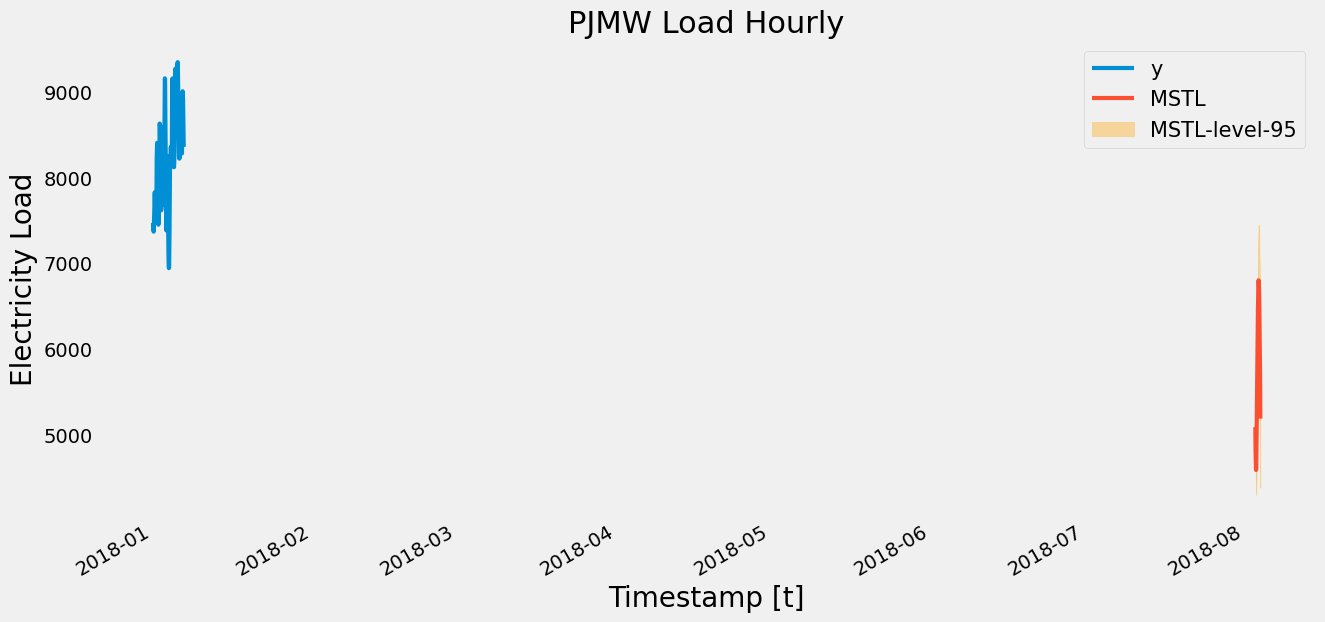

In [69]:
fig, ax = plt.subplots(1, 1,  figsize=(14,7))

df_plot = pd.concat([df, forecasts]).set_index('ds').tail(24*7)
df_plot[['y','MSTL']].plot(ax=ax, linewidth=3)
ax.fill_between(df_plot.index, 
                df_plot['MSTL-lo-95'], 
                df_plot['MSTL-hi-95'],
                alpha=.35,
                color='orange',
                label='MSTL-level-95')
ax.set_title('PJMW Load Hourly', fontsize=22)
ax.set_ylabel('Electricity Load', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [70]:
def plot_forecasts(y_hist, y_true, y_pred, models):
    _, ax = plt.subplots(1, 1, figsize = (20, 7))
    y_true = y_true.merge(y_pred, how='left', on=['unique_id', 'ds'])
    df_plot = pd.concat([y_hist, y_true]).set_index('ds').tail(24 * 7)
    df_plot[['y'] + models].plot(ax=ax, linewidth=2)
    colors = ['orange', 'green', 'red']
    for model, color in zip(models, colors):
        ax.fill_between(df_plot.index, 
                        df_plot[f'{model}-lo-90'], 
                        df_plot[f'{model}-hi-90'],
                        alpha=.35,
                        color=color,
                        label=f'{model}-level-90')
    ax.set_title('PJMW Load Hourly', fontsize=22)
    ax.set_ylabel('Electricity Load', fontsize=20)
    ax.set_xlabel('Timestamp [t]', fontsize=20)
    ax.legend(prop={'size': 15})
    ax.grid()


In [73]:
df_test = df.tail(24*7)
df_train = df.drop(df_test.index)


In [74]:
sf = StatsForecast(
    models=[mstl, SeasonalNaive(season_length=24)], # add SeasonalNaive model to the list
    freq='H'
)


In [75]:
from time import time

init = time()
sf = sf.fit(df=df_train)
forecasts_test = sf.predict(h=len(df_test), level=[90])
end = time()
forecasts_test.head()

ds         MSTL   MSTL-lo-90   MSTL-hi-90  \
unique_id                                                                
PJMW_hourly 2018-08-03 01:00:00  5086.084473  5004.467773  5167.701660   
PJMW_hourly 2018-08-03 02:00:00  4798.021484  4667.769043  4928.273926   
PJMW_hourly 2018-08-03 03:00:00  4697.667480  4520.328125  4875.006348   
PJMW_hourly 2018-08-03 04:00:00  4586.873535  4366.038574  4807.708496   
PJMW_hourly 2018-08-03 05:00:00  4608.391602  4347.274902  4869.508789   

             SeasonalNaive  SeasonalNaive-lo-90  SeasonalNaive-hi-90  
unique_id                                                             
PJMW_hourly         5100.0          2988.744629          7211.255371  
PJMW_hourly         4840.0          2728.744629          6951.255371  
PJMW_hourly         4745.0          2633.744629          6856.255371  
PJMW_hourly         4572.0          2460.744629          6683.255371  
PJMW_hourly         4594.0          2482.744629          6705.255371

In [76]:
time_mstl = (end - init) / 60
print(f'MSTL Time: {time_mstl:.2f} minutes')


MSTL Time: 2.70 minutes


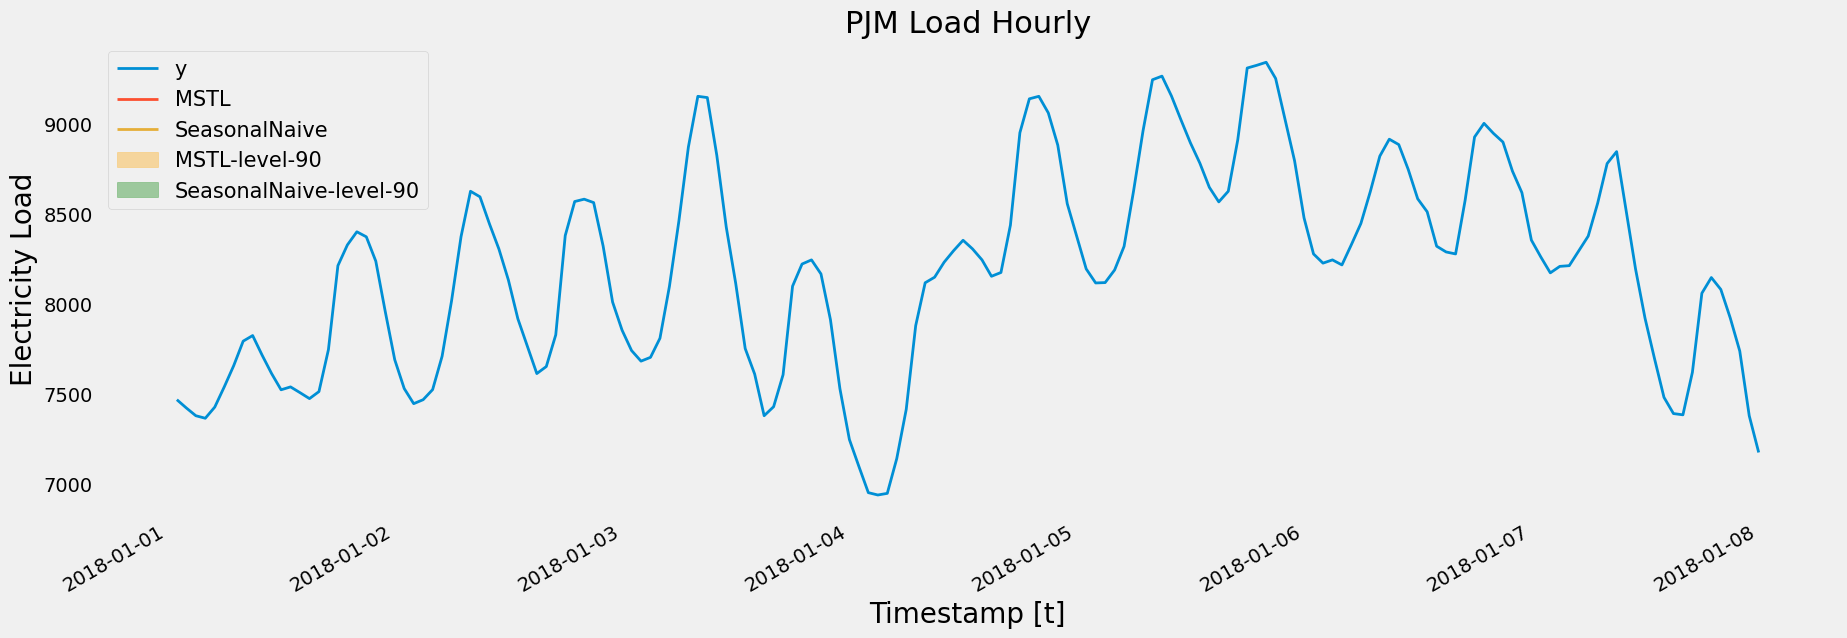

In [77]:
plot_forecasts(df_train, df_test, forecasts_test, models=['MSTL', 'SeasonalNaive'])


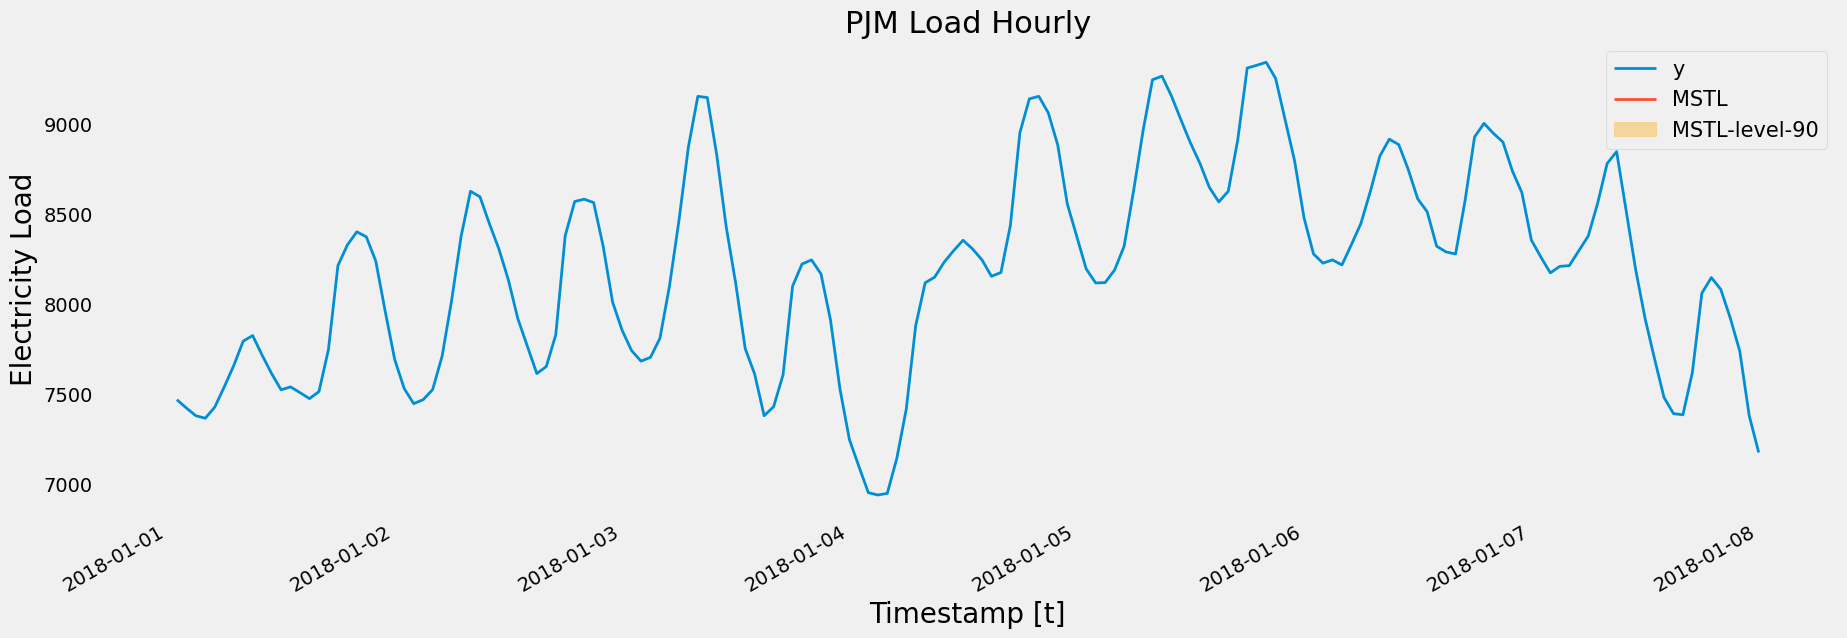

In [78]:
plot_forecasts(df_train, df_test, forecasts_test, models=['MSTL'])


In [80]:
from prophet import Prophet

# create prophet model
prophet = Prophet(interval_width=0.9)
init = time()
prophet.fit(df_train)
# produce forecasts
future = prophet.make_future_dataframe(periods=len(df_test), freq='H', include_history=False)
forecast_prophet = prophet.predict(future)
end = time()
# data wrangling
forecast_prophet = forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_prophet.columns = ['ds', 'Prophet', 'Prophet-lo-90', 'Prophet-hi-90']
forecast_prophet.insert(0, 'unique_id', 'PJM_Load_hourly')
forecast_prophet.head()


18:18:49 - cmdstanpy - INFO - Chain [1] start processing
18:21:35 - cmdstanpy - INFO - Chain [1] done processing


unique_id                  ds      Prophet  Prophet-lo-90  \
0  PJM_Load_hourly 2018-08-03 01:00:00  5428.534718    4448.222681   
1  PJM_Load_hourly 2018-08-03 02:00:00  5216.824874    4243.273736   
2  PJM_Load_hourly 2018-08-03 03:00:00  5104.464667    4179.796261   
3  PJM_Load_hourly 2018-08-03 04:00:00  5101.578666    4172.139122   
4  PJM_Load_hourly 2018-08-03 05:00:00  5214.800581    4244.129442   

   Prophet-hi-90  
0    6367.816556  
1    6164.717554  
2    6028.858802  
3    6038.774106  
4    6196.955414

<Axes: >

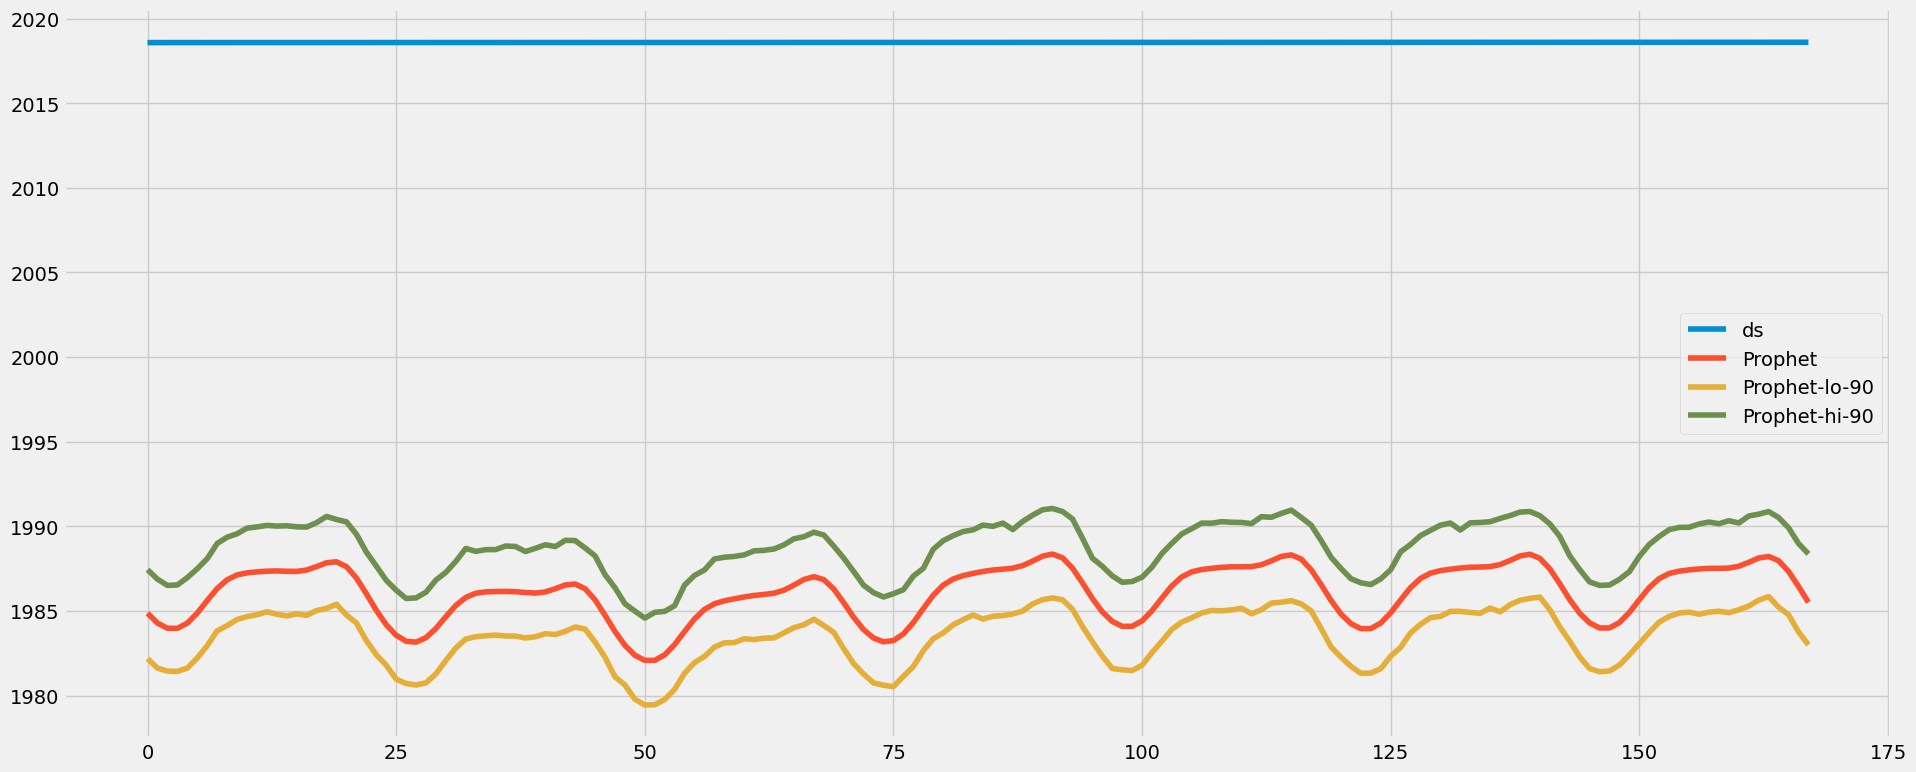

In [87]:
forecast_prophet.plot()